## Problem Statement
###### An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Importing Libraries and Data

 
### 1.1 Import Libraries, Suppress Warnings and Set Display


In [1]:
# import necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### 1.2 Reading Data

In [2]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# pd.set_option('display.float_format', lambda x: '%.4f' % x) 

In [3]:
# Reading the dataset
df_leads = pd.read_csv("Leads.csv")

In [4]:
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
df_leads.shape

(9240, 37)

## 2. Data understanding

In [6]:
# Check summary of all numerical columns to understand the dataset better in terms of spread and 
# also spot anything unusual

df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# checking number of unique values in each column
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [8]:
# Check data types of columns and nulls
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<b>NOTE<b>: There are null values in the dataframe



In [9]:
#Checking for count of missing values in each column
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

<b>NOTE:</b> There are few columns with quite a high number of missing/null values in the dataframe. We will have to decide how to address them in data cleaning / data imputation step

In [10]:
# Check for duplicate rows
print(df_leads.duplicated().sum())

0


<b>NOTE:</b> There are no duplicates in the dataframe df_leads.

## 3. Data cleaning

### 3.1 Treatment for 'Select' values


As mentioned in the Problem Statement, many of the categorical variables have a level called  <b>'Select' which needs to be handled because it is as good as a null value.</b> One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select.

In [11]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [12]:
# Converting 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [13]:
# Checking if all 'Select' values have been handled in the columns
cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


### 3.2 Missing values treatment

In [14]:
# Calculating Missing Values Percentage

100*(df_leads.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### 3.2.1 dropping columns having missing values percentage > 37 %

In [15]:
# user defined function to drop columns and know the shape before and after dropping

def dropNullColumns(data ,percentage=37):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",data.shape)

In [16]:
# dropping columns using UDF
dropNullColumns(df_leads) 

Total columns dropped:  8 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 29)


In [17]:
# Checking the percentage of null values for remaining columns

100*(df_leads.isna().mean()).sort_values(ascending=False)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
X Education Forums                                0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.0000

#### 3.2.3 Columns with Categorical Data

In [18]:
# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


<b>NOTE:</b> Approach would be to check the count of values in each categorical column and then decide how to treat the missing values for that particular column

In [19]:
columnsList= ["Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64 

_____________________________________________________________________________

### Insights
<b>Specialization</b>: Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called 'Others'.

<b>Tags</b>: Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

<b>What matters most to you in choosing a course</b>: This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.

<b>What is your current occupation</b>: We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed.

<b>Country</b>: X Education sells online courses and appx 96% of the customers are from India. Does not make business sense right now to impute missing values with India. Hence Country column can be dropped.

<b>Last Activity</b>: "Email Opened" is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with label 'Email Opened'.

<b>Lead Source</b>: "Google" is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with label 'Google'

🧹<b>Dropping the following columns </b>
- Tags,
- Country,
- What matters most to you in choosing a course

In [20]:
# Dropping Columns
print("Before Drop",df_leads.shape)
df_leads.drop(['Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",df_leads.shape)

Before Drop (9240, 29)
After Drop (9240, 26)


🪄 <b>Imputing the following columns </b>
- Specialization,
- Lead Source,
- Last Activity,
- What is your current occupation

In [21]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [22]:
# Re Checking the percentage of null values for remaining columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

<b>NOTE</b> Now we have  following columns reaminingn for treatment of missing values:

``
TotalVisits                                 1.48
Page Views Per Visit                        1.48
``

In [23]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
df_leads.TotalVisits.value_counts().head(10)
df_leads.columns

TotalVisits - Value Counts
----------------------------------------


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
# Page Views Per Visit
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
df_leads['Page Views Per Visit'].value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

<b> for both  missing values to be imputed with mode </b> 

In [25]:
# TotalVisits missing values to be imputed with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)
# Page Views Per Visit missing values to be imputed with mode
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

#### Re- checking with null values

In [26]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df_leads.isnull().sum()/df_leads.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.3 Removing unwanted columns

In [27]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*df_leads['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

#### 3.3.1 Dropping columns of no use for modeling

<b>NOTE: Columns such as </b>

- Prospect ID,
- Lead Number,
- Last Notable Activity

Above columns do not add any value to the model. Dropping these columns will remove unnecessary data from the dataframe.

In [28]:
# Dropping Columns
print("Before Dropping Columns",df_leads.shape)
df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df_leads.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 23)


#### 3.3.2 Columns with unique values

In [29]:
df_leads.nunique()

Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                19
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Co

In [30]:
# get the percentage of missing values in each row,output in descending order so high value will come on top

100*(df_leads.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

In [31]:
# Dropping unique valued columns
df_leads= df_leads.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)
# list of columns after removing unique valued columns
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

### 3.4 Checking & Dropping Category Columns that are Skewed
<strong>NOTE:</strong> This is similar to the handling of unique values in numeric columns

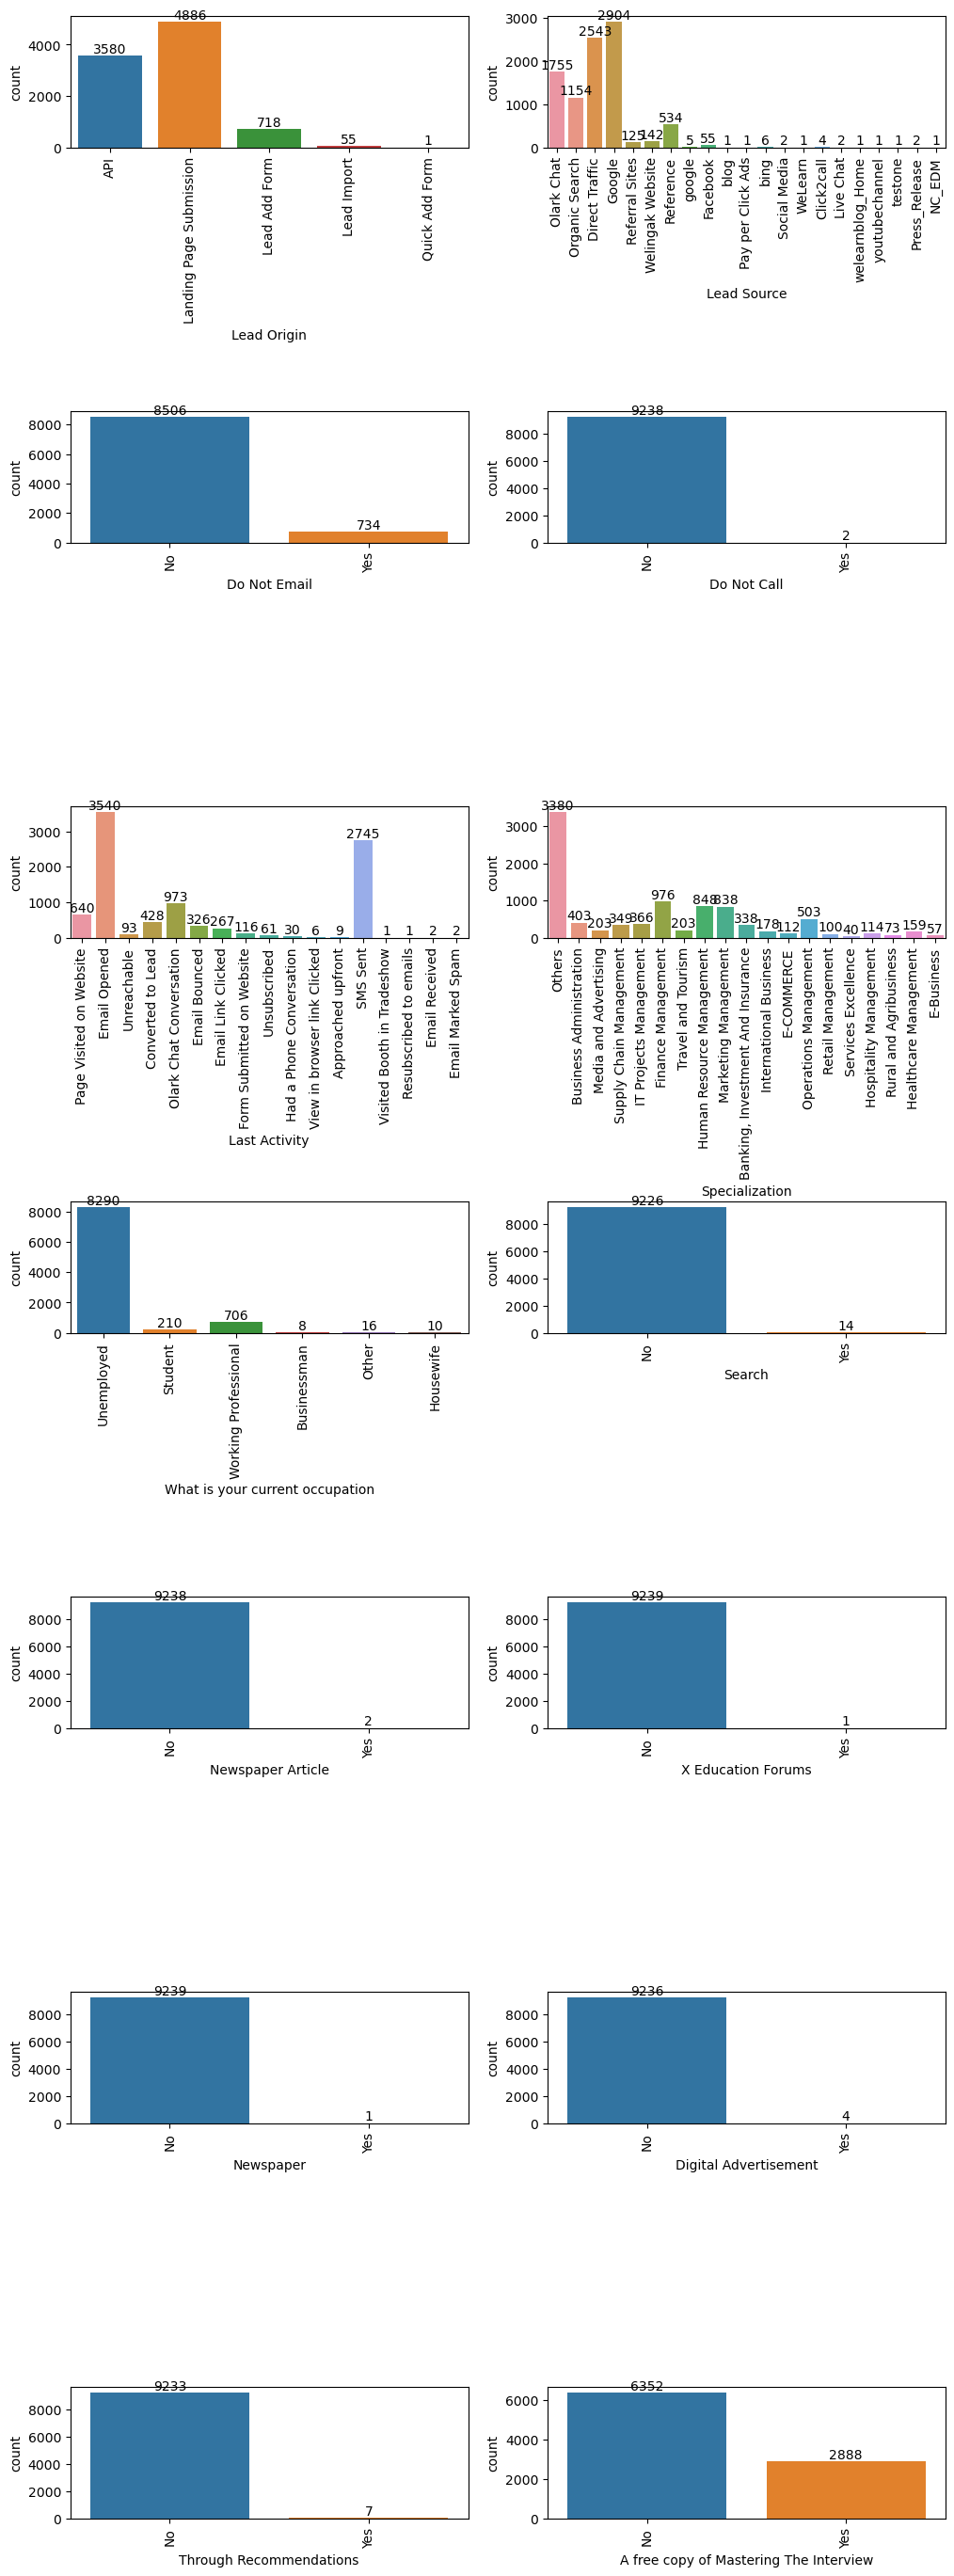

In [32]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_col = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(12,40))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categorical_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=df_leads) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

<strong><span style="color:blue">NOTE:</span></strong> Following columns have data which is `highly skewed` :
- 'Do Not Call',
- 'Search', 
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper', 
- 'Digital Advertisement',
- 'Through Recommendations'. 

Hence these columns will be `dropped` as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can `lead to biased` or `inaccurate parameter estimates`

In [33]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df_leads.shape)
df_leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df_leads.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [34]:
df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

#### 🎯Data is clean from missing values 
 - After data is cleaned lets standardise values 

### 3.5 Outlier Treatment

#### Numerical Columns

In [35]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=24)
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='red')

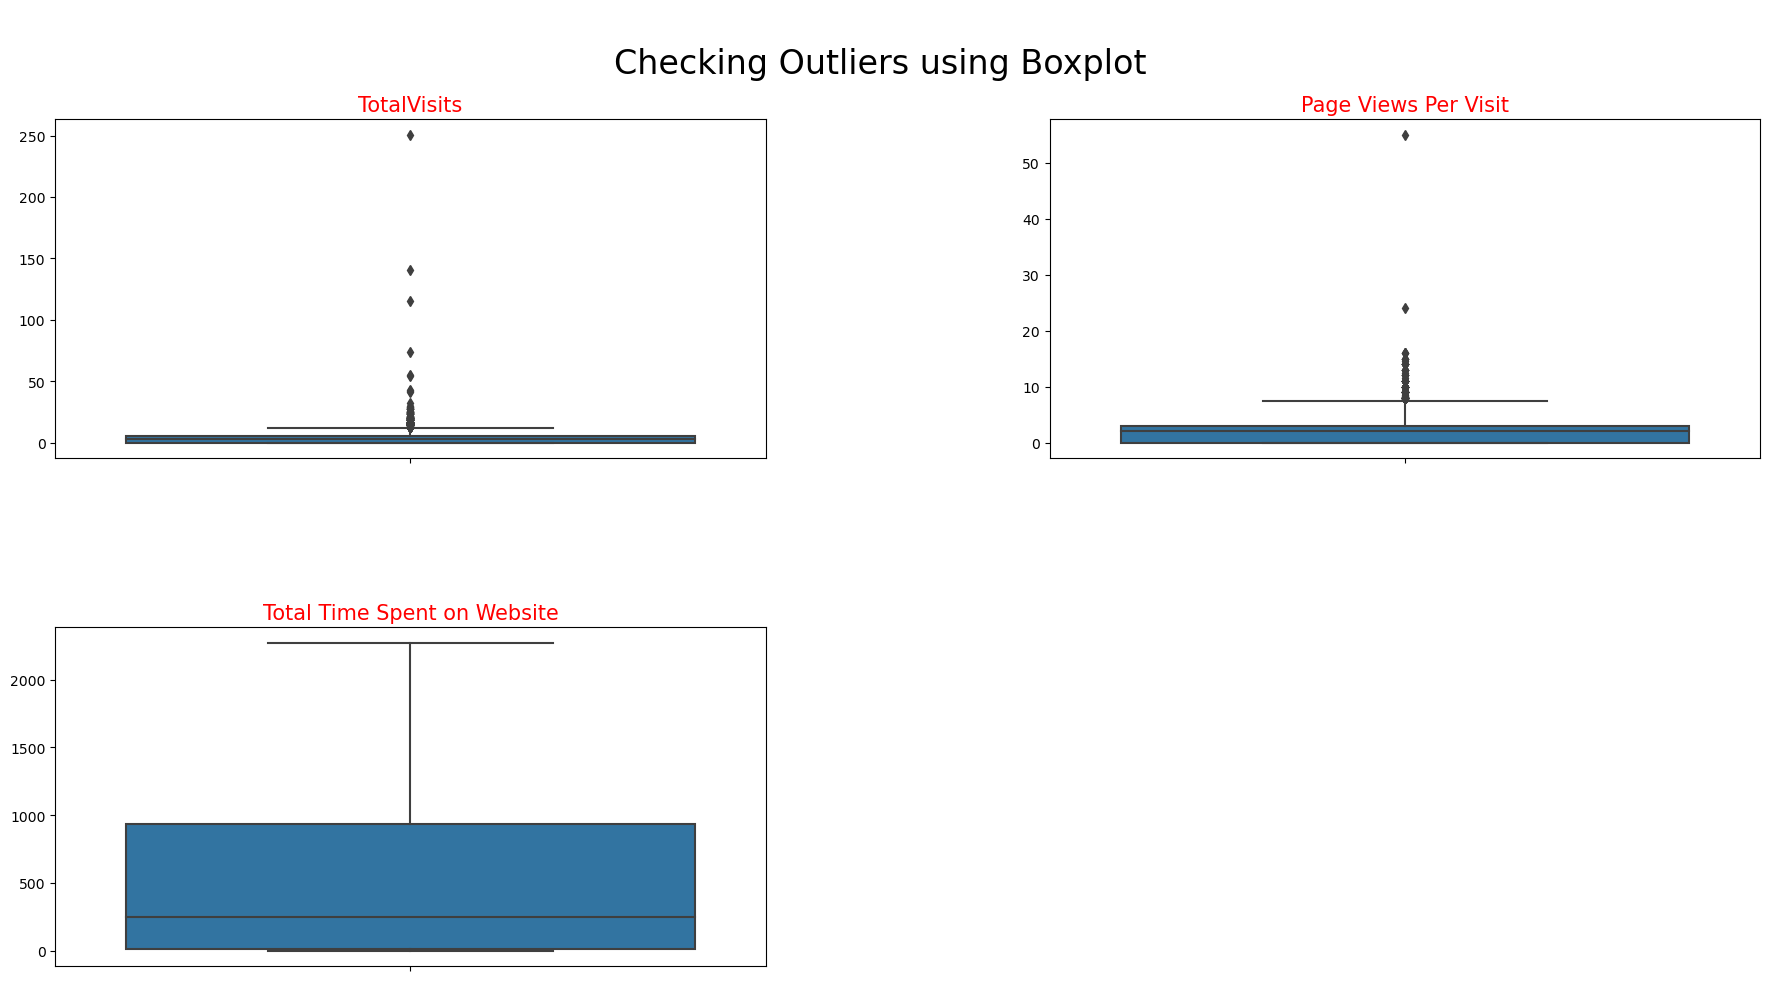

In [36]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(df_leads,num_cols)

`"TotalVisits"`,`"Page Views Per Visit"`:Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

In [37]:
# before outlier treatment
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [38]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [39]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df_leads,capping_cols)

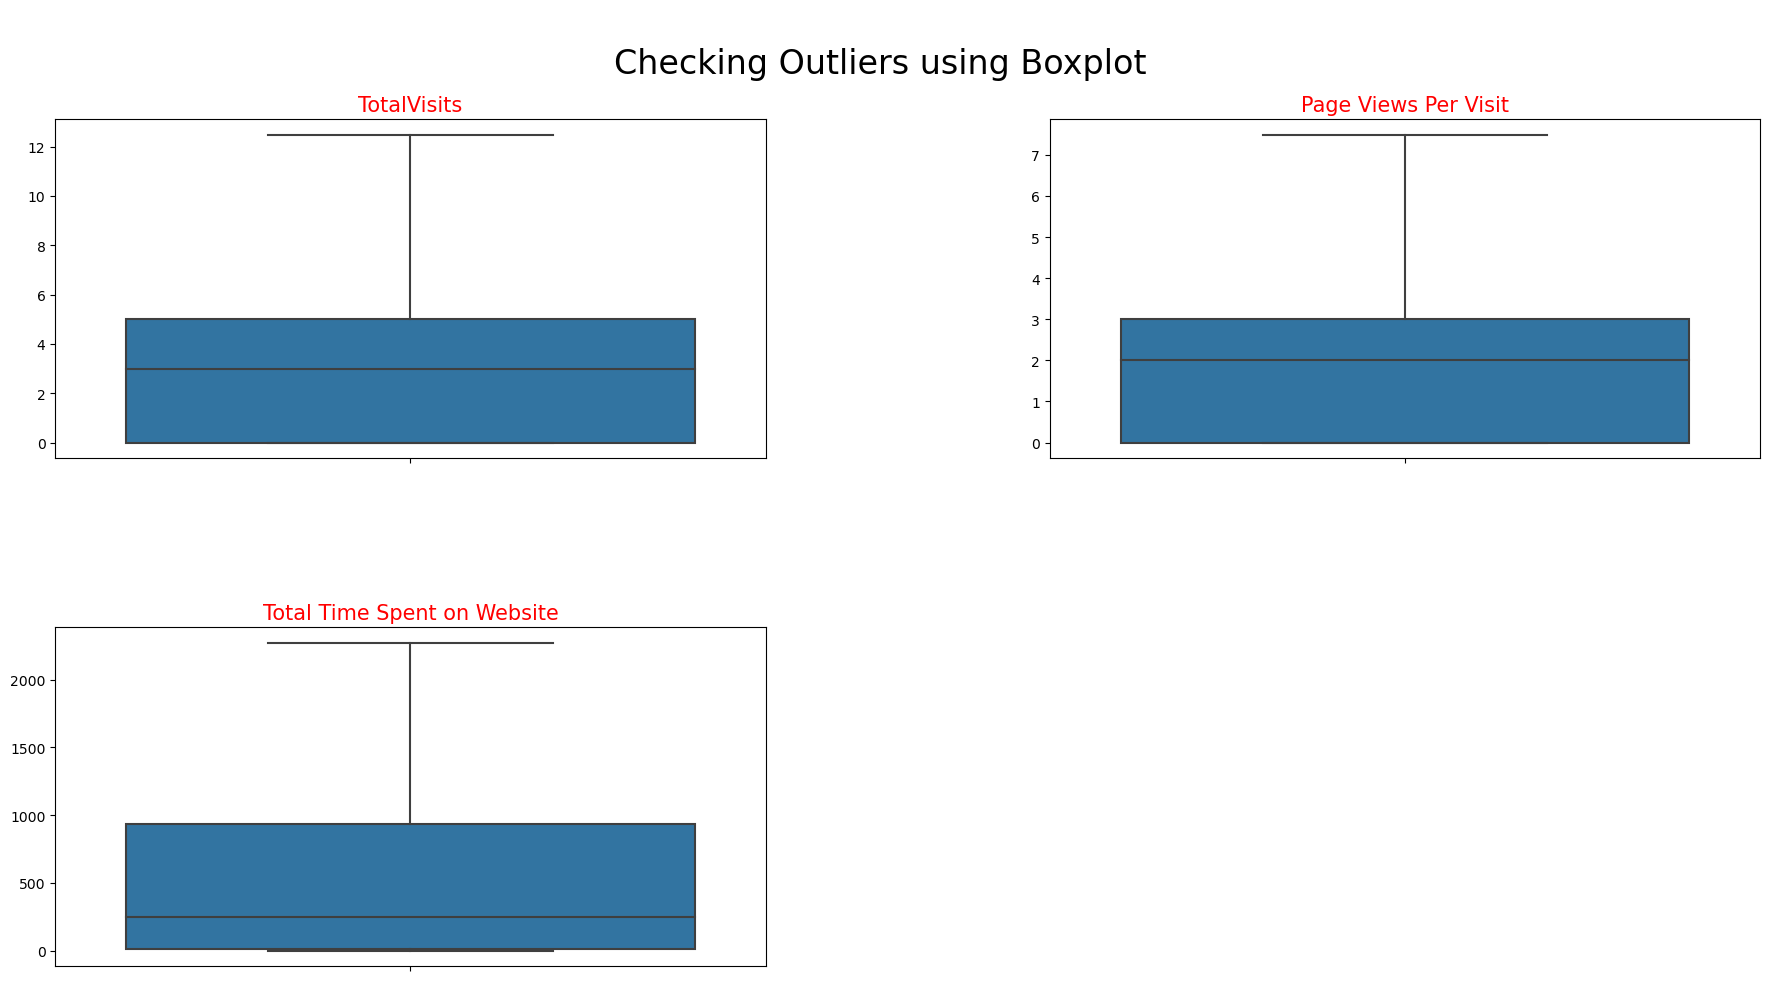

In [40]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [41]:
# after outlier treatment detailed percentile values
df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

### 3.6 Fixing Invalid values & Standardising Data in columns

- Checking if entries in data are in correct format or not , casing styles (UPPER,lower)
- Checking data types of columns

In [42]:
df_leads.head()## Categorical Variables 

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [43]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_@_"*60,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@__@_ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823

<strong>NOTE:</strong> 

- We've noticed that some categories/levels in the `"Lead Score" and "Last Activity"` columns have very few records. To prevent ending up with a bunch of unnecessary columns when we create dummy variables, we're planning to group these categories together under "Others". That way, we can keep things neat and tidy.

- Also we can see `"Google"` & `"google"` are same in `"Lead Source"`, so we will standardise the case.

#### 3.6.1 Grouping Low frequency values

In [44]:
## user defined function for Grouping Low frequency values
def replace_low_freq_to_others(column_name, replace_list):
     df_leads[column_name]= df_leads[column_name].replace(replace_list,'Others')

In [45]:
## replacing for column Lead Score
# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")
lead_score_replace_list=["bing","Click2call","Press_Release","Social Media","Live Chat","youtubechannel",
                         "testone","Pay per Click Ads","welearnblog_Home","WeLearn","blog","NC_EDM","Facebook"]
replace_low_freq_to_others('Lead Source',lead_score_replace_list)
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Others               0.844156
Name: Lead Source, dtype: float64

In [46]:
## replacing for column Last Activity
last_activity_replace_list=['Unreachable','Unsubscribed','Had a Phone Conversation',
                            'Approached upfront','View in browser link Clicked', 'Email Marked Spam',
                            'Email Received','Visited Booth in Tradeshow','Resubscribed to emails']
replace_low_freq_to_others('Last Activity',last_activity_replace_list)
# value_counts percentage after replace
df_leads["Last Activity"].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [47]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

df_leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free_copy  
0        No  
1        No  
2       Yes  
3        No  
4        No

<strong><span style="color:blue">NOTE:</span></strong> 
- "Do Not Email" & "Free_copy" both are binary categorical columns lets map both of them yes/no to 1/0

#### 3.6.2 Mapping Binary categorical variables

In [48]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

<b> Now checking data types </b>

In [49]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


## Step 4: Data Analysis (EDA)

### 4.1 Checking if Data is Imbalanced or not
- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset
- Data imbalance is in the context of Target variable only
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted 

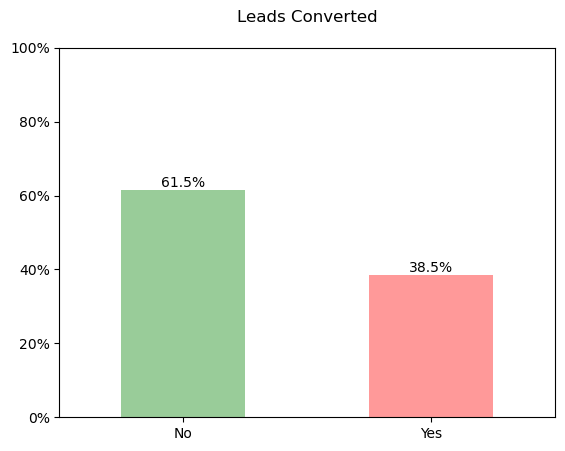

In [50]:
## ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n")
# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()


<strong><span style="color:purple">Insights:</span></strong> 
- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

In [51]:
### Ratio of Data Imbalance
ratio=(df_leads["Converted"].value_counts(normalize=True).loc[0])/(df_leads["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


#### 4.2.1 Univariate Analysis for Categorical Variables

In [52]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

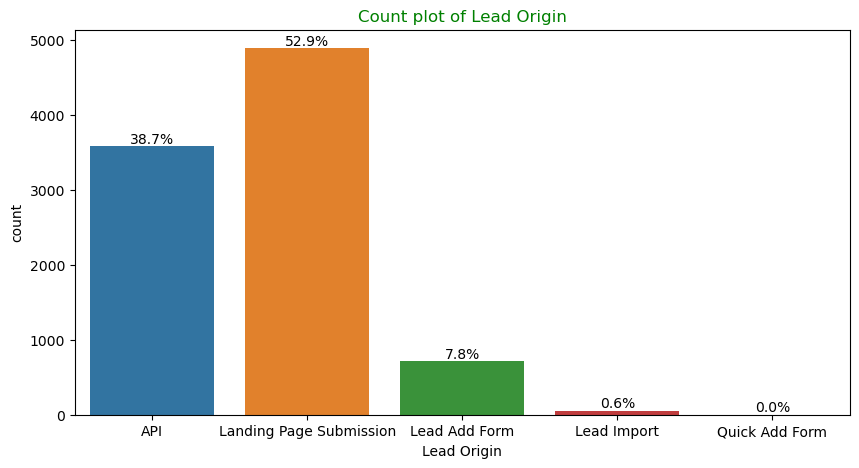

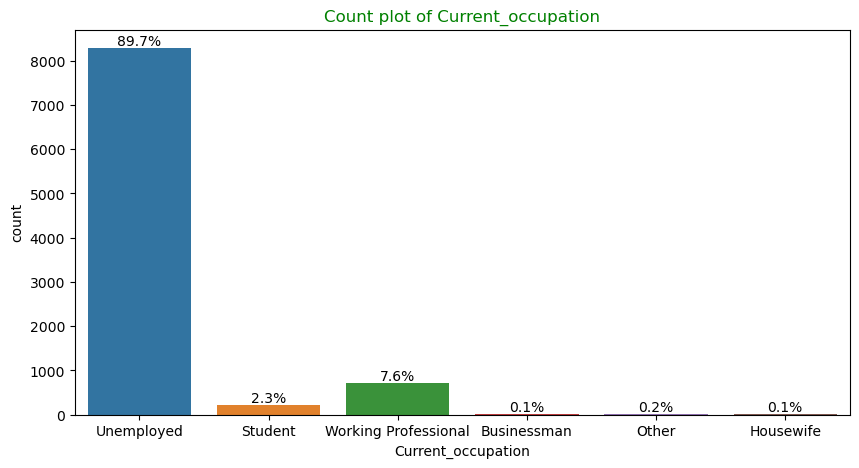

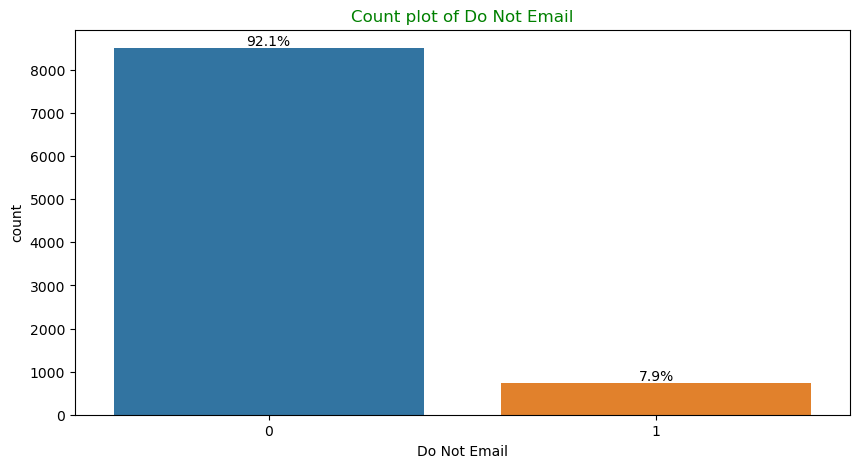

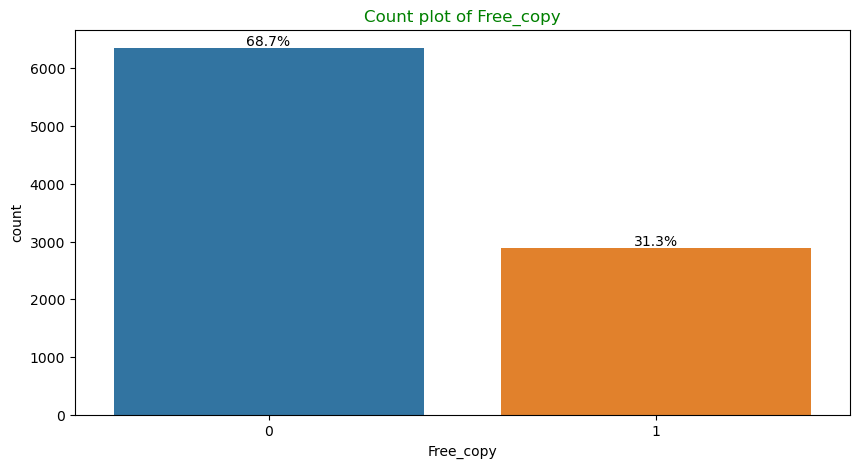

In [53]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

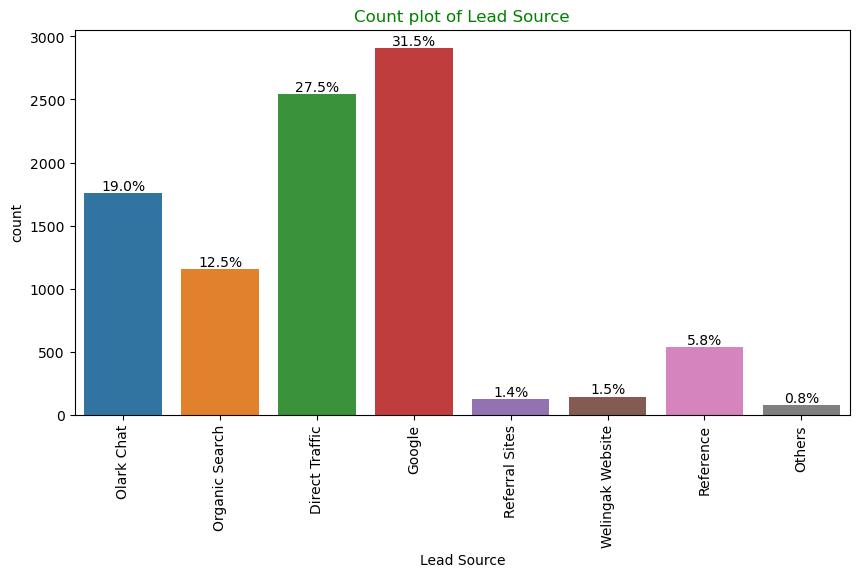

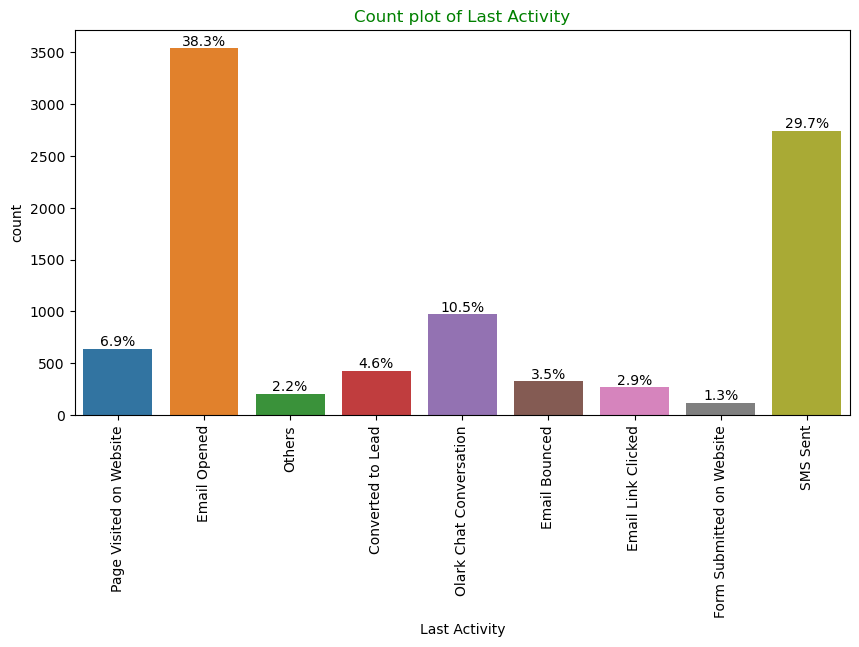

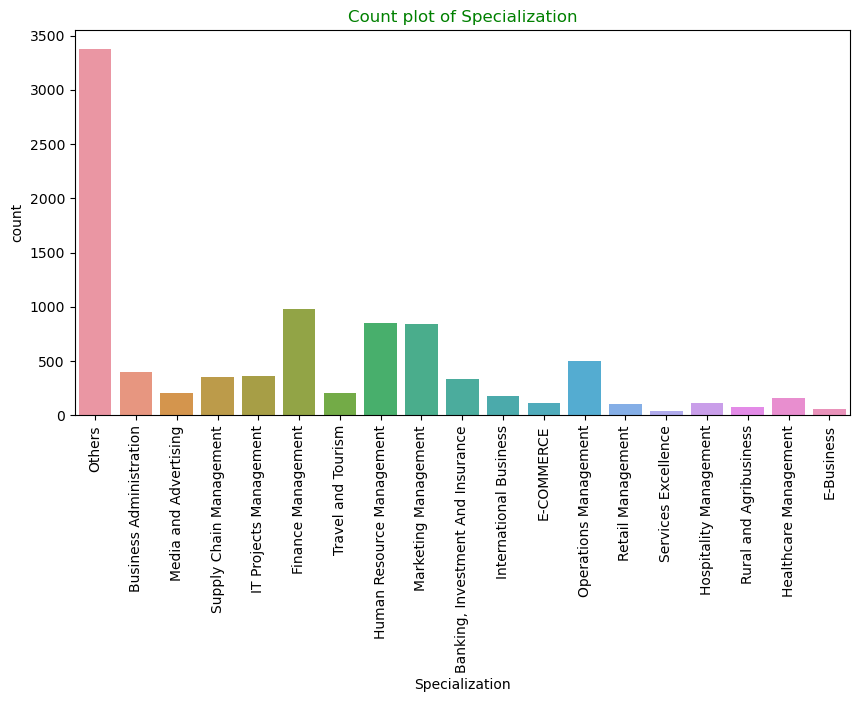

In [54]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

<strong><span style="color:purple">Insights Univariate:</span></strong>  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)** 

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 

- **Current_occupation:** It has 90% of the customers as Unemployed

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

<strong><span style="color:blue">NOTE:</span></strong> These insights will be helpful in further Bivariate Analysis

### 4.3 Bivariate Analysis
- Bivariate analysis happens between two variables

#### 4.3.1 Bivariate Analysis for Categorical Variables


In [55]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


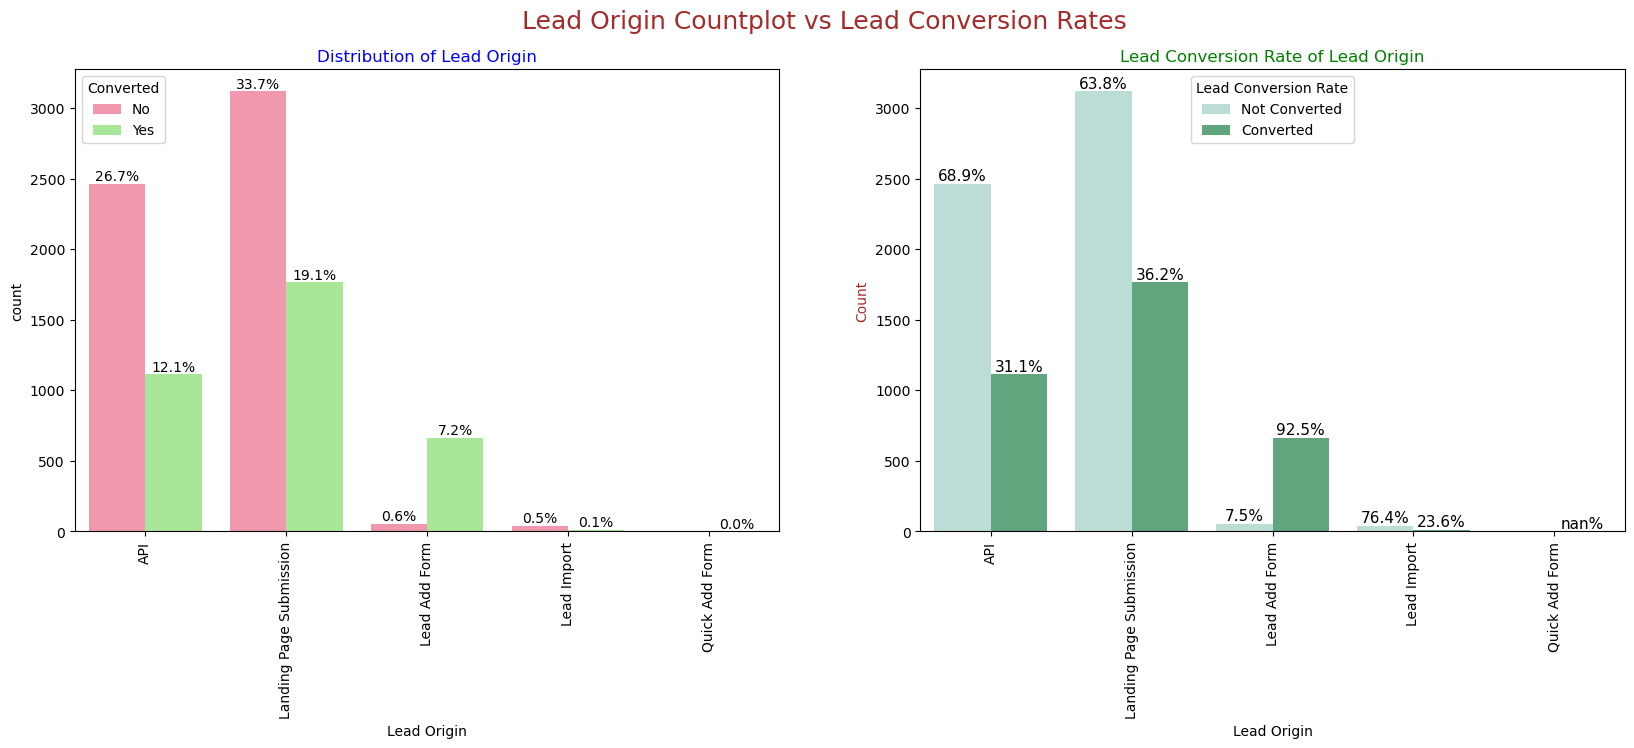

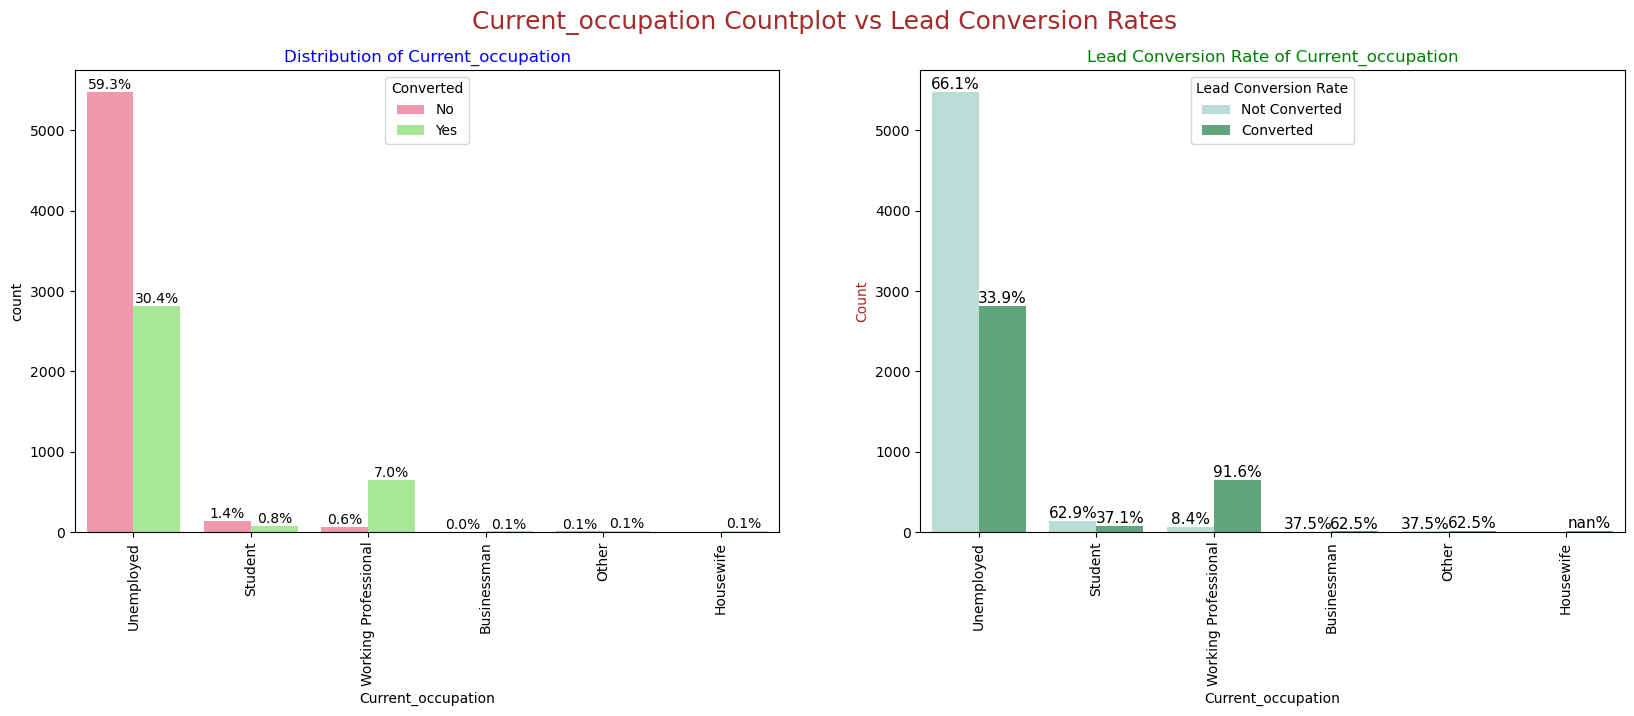

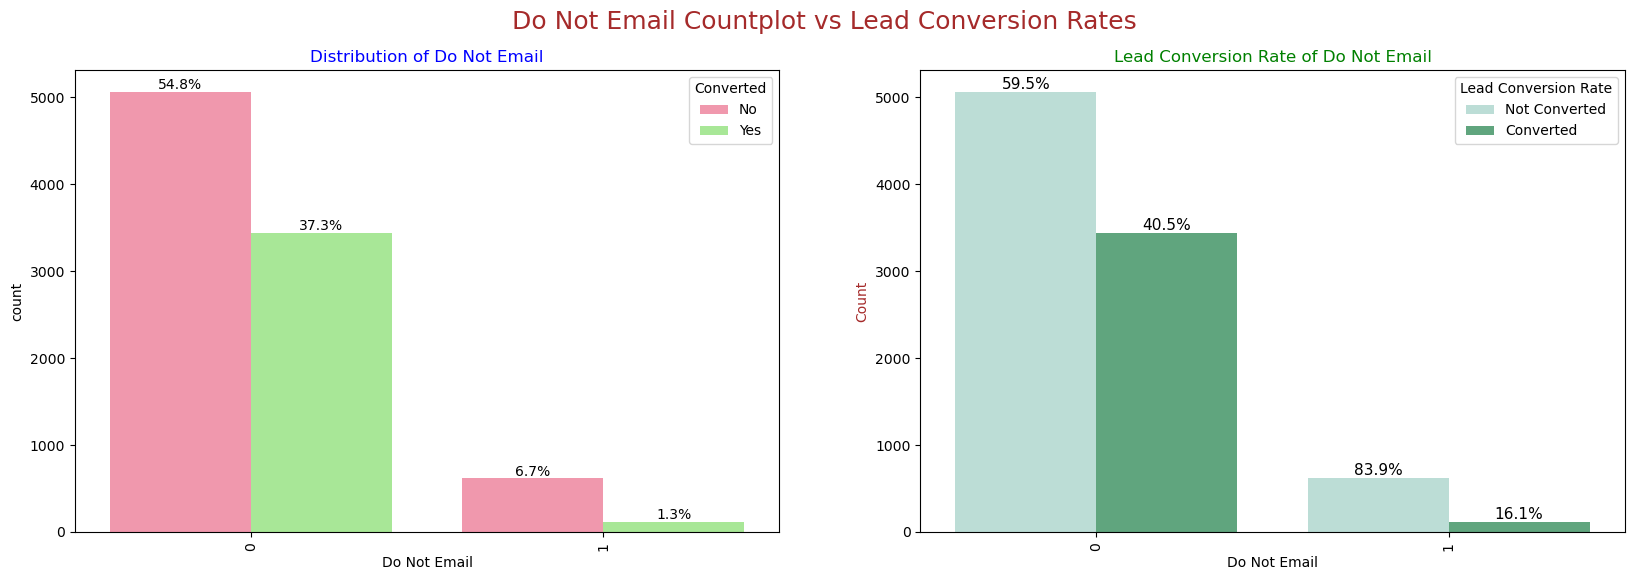

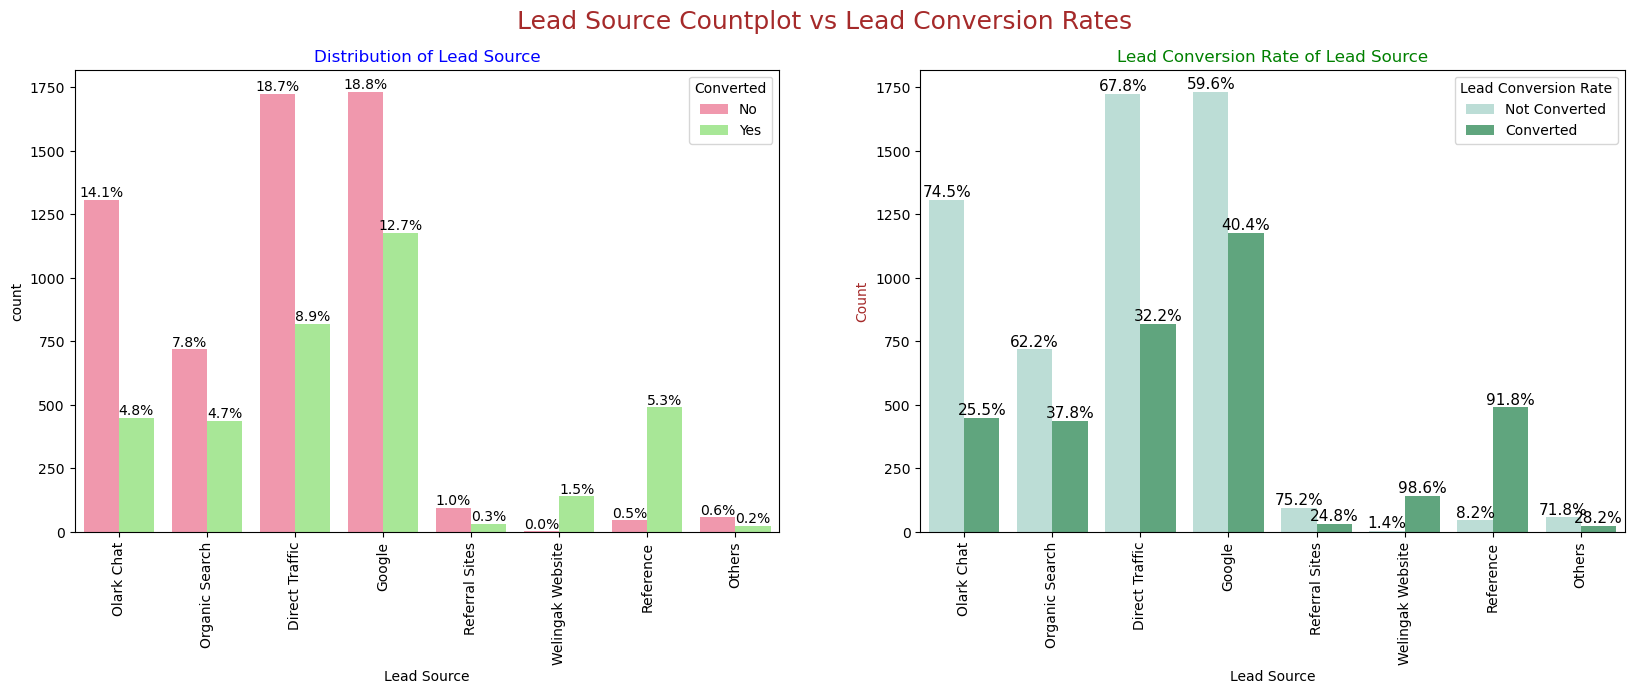

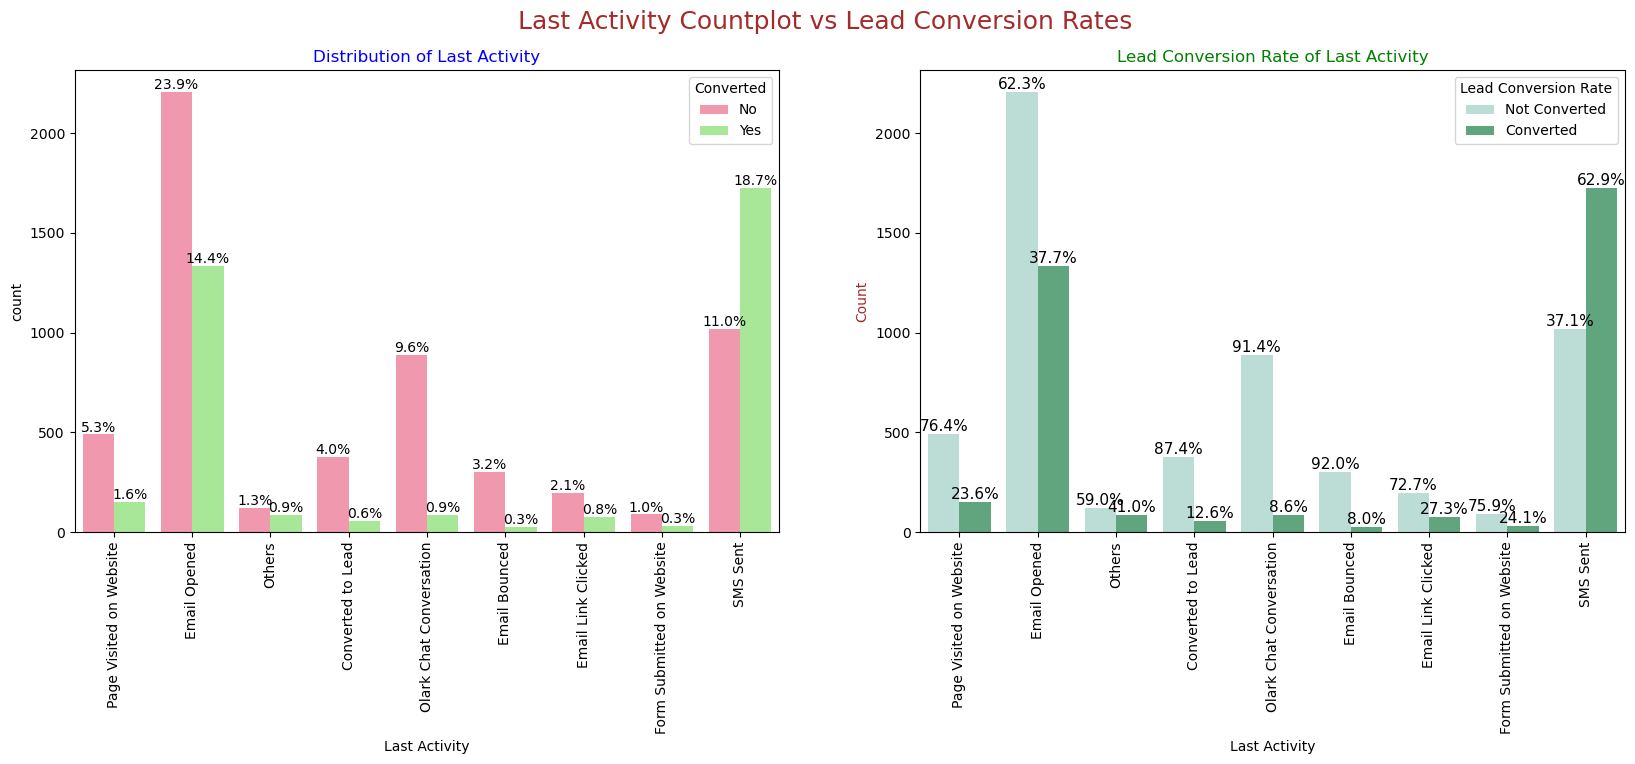

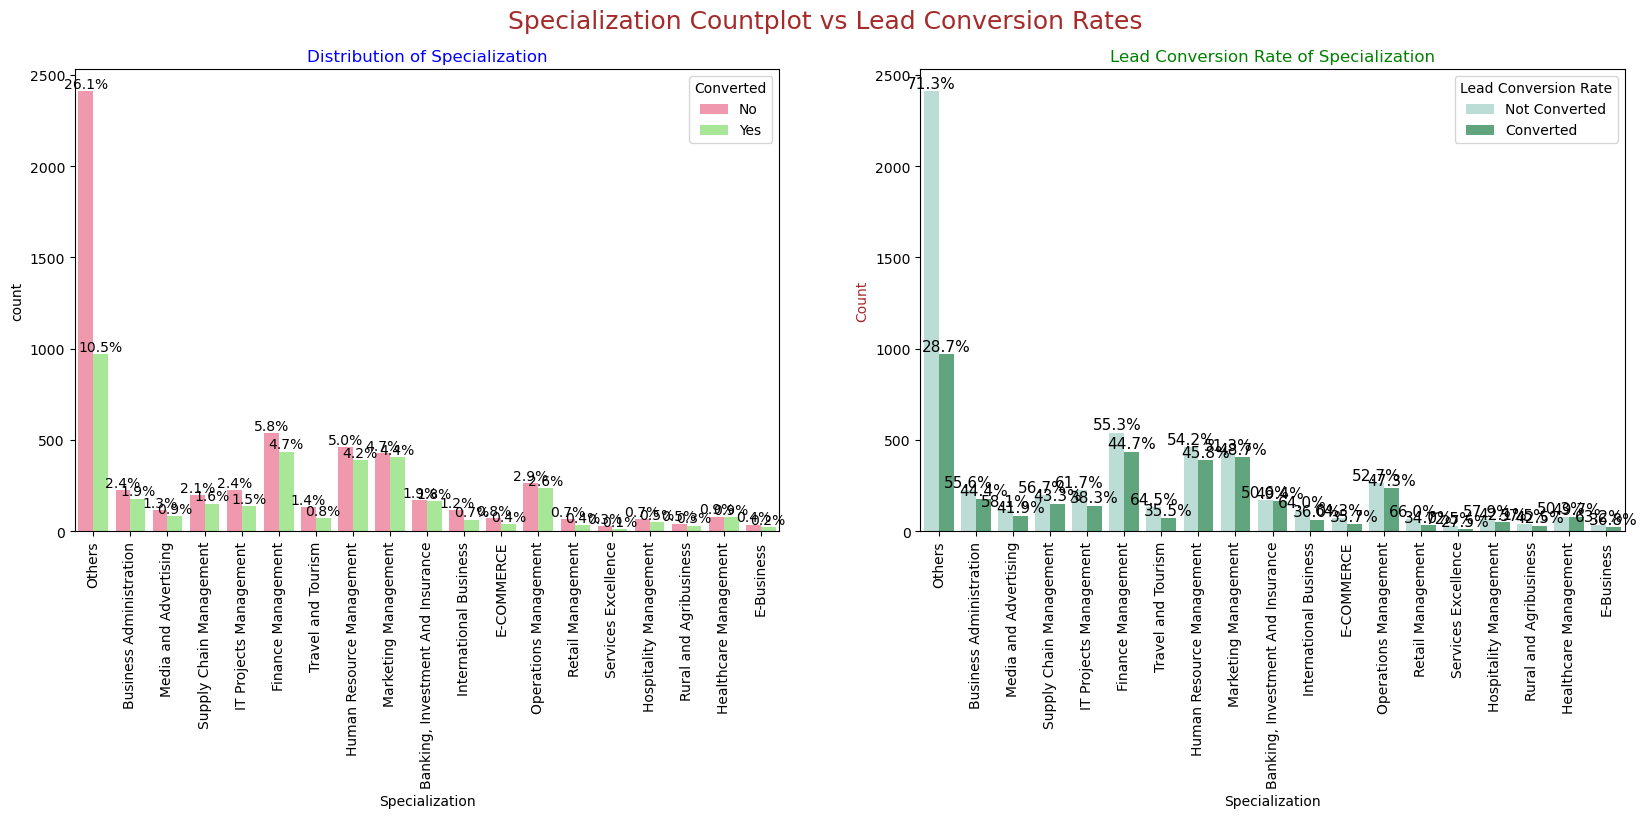

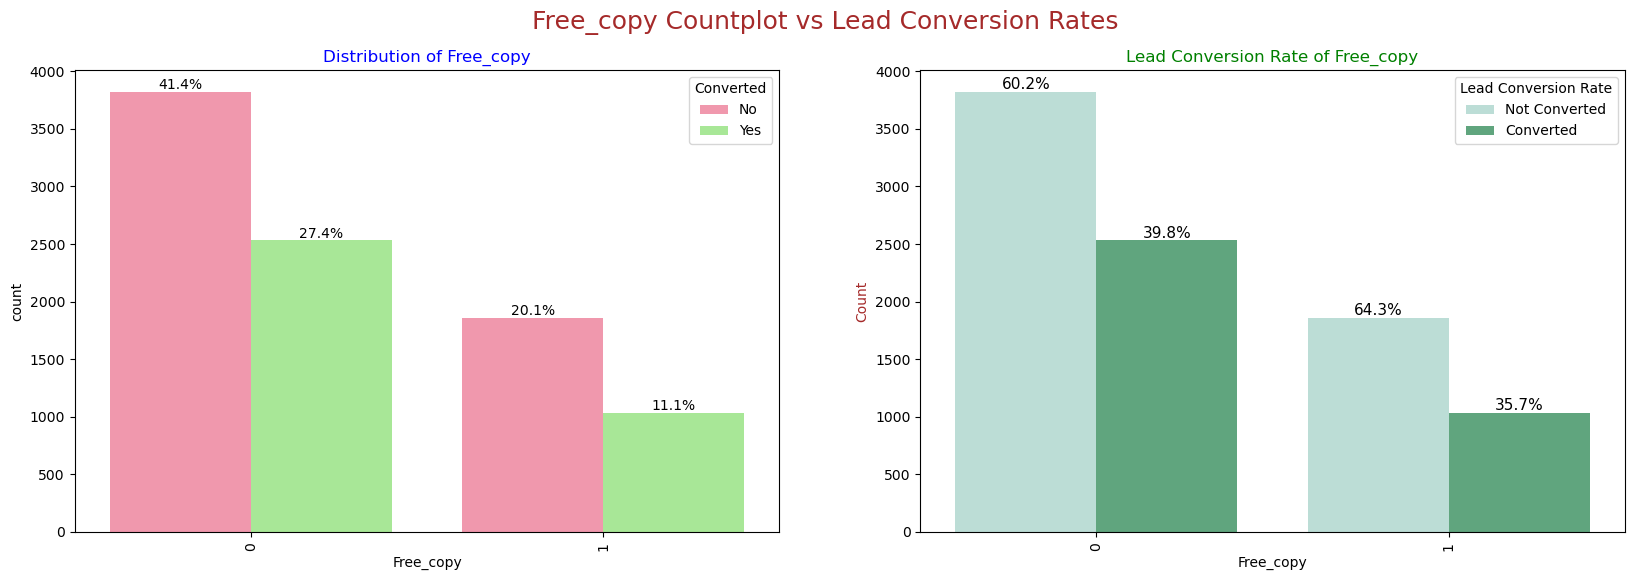

In [56]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for category in cat_cols:
    Bivariate_cat(df_leads,variable_name=category)

<strong><span style="color:purple">Insights:</span></strong> 

- <strong><span style="color:Green">Lead Origin:</span></strong> Around 52% of all leads originated from _"Landing Page Submission"_ with a **lead conversion rate (LCR) of 36%**.The _"API"_ identified approximately 39% of customers with a **lead conversion rate (LCR) of 31%**.

- <strong><span style="color:Green">Current_occupation:</span></strong> Around 90% of the customers are _Unemployed_ with **lead conversion rate (LCR) of 34%**. While _Working Professional_ contribute only 7.6% of total customers with almost **92% lead conversion rate (LCR)**.

- <strong><span style="color:Green">Do Not Email:</span></strong> 92% of the people has opted that they dont want to be emailed about the course. 

<strong><span style="color:Blue">Note:</span></strong> We have assumed **LCR** as **Lead Conversion Rate** in short form.
<hr/>

- <strong><span style="color:Green">Lead Source:</span></strong> _Google_ has **LCR of 40%** out of 31% customers , _Direct Traffic_ contributes **32% LCR** with 27% customers which is lower than Google,_Organic Search_ also gives **37.8% of LCR** but the contribution is by only 12.5% of customers ,_Reference_ has **LCR of 91%** but there are only around 6% of customers through this Lead Source.

- <strong><span style="color:Green">Last Activity:</span></strong> _'SMS Sent'_ has **high lead conversion rate of 63%** with 30% contribution from last activities, _'Email Opened'_ activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.

- <strong><span style="color:Green">Specialization:</span></strong> Marketing Managemt,HR Management,Finance Management shows good contribution.

#### 4.3.2 Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

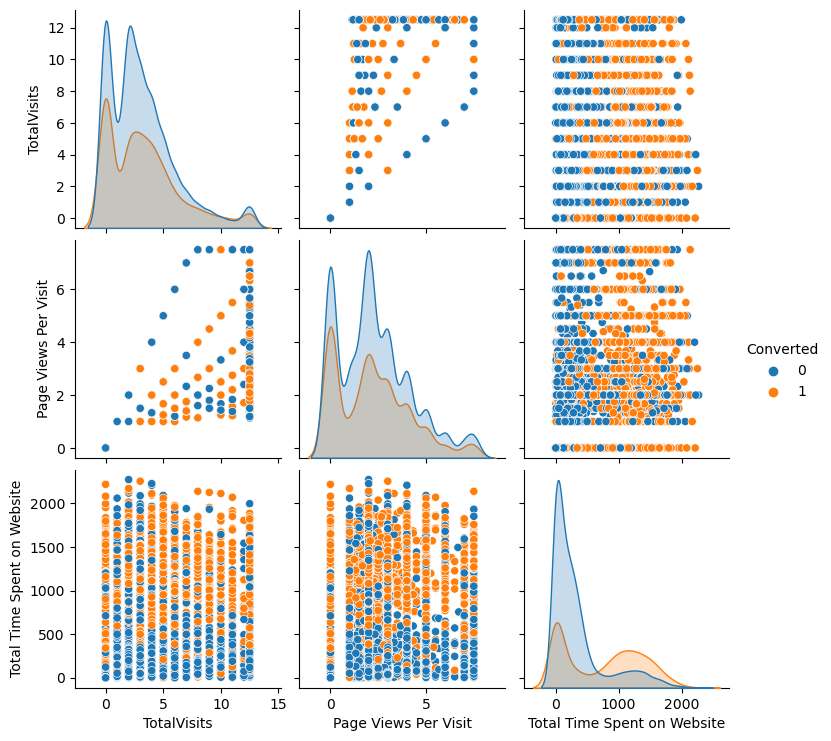

In [57]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [58]:
num_cols =['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

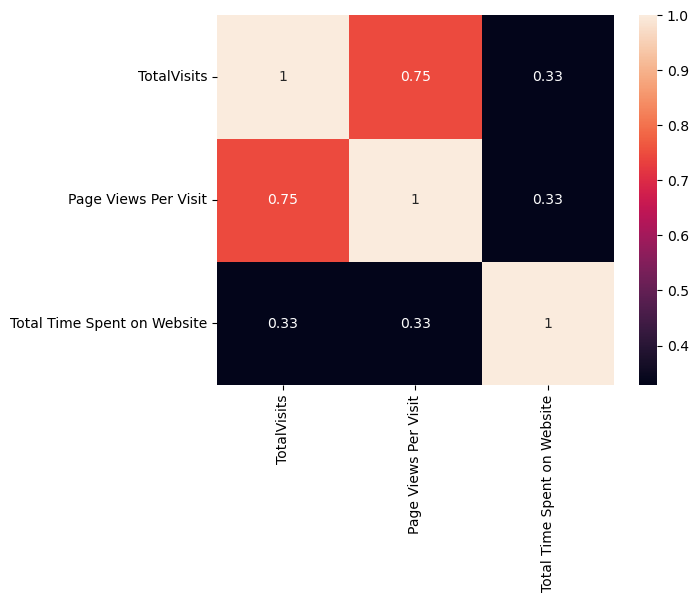

In [59]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df_leads[num_cols].corr(),annot=True)
plt.show()

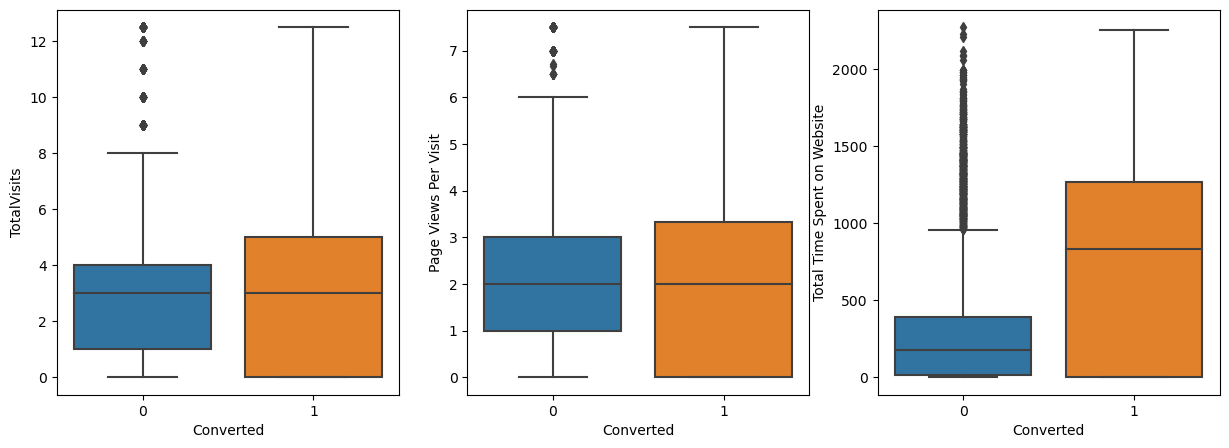

In [60]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

<strong><span style="color:purple">Insights:</span></strong> 
- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## Step 5: Data Preparation

### 5.1 Dummy Variables
- For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [61]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [62]:

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [63]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0          0                                    0                          0   
1          0                                    0                          0   
2          1                                    1                          0   
3          0                                    1                          0   
4          0                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Google  \
0                        0                           0                   0   
1                        0                           0                   0   
2                        0                           0                   0   
3                        0                           0                   0   
4                        0                           0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0                       1                           0                   0   
1                       0                           1                   0   
2                       0                           0                   0   
3                       0                           0                   0   
4                       0                           0                   0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3     

In [64]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

df_leads.shape

(9240, 48)

In [65]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Google                  

## Step 6: Test-Train Split

In [66]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]


In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [68]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 47) 
y_train: (6468,)


In [69]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 47) 
y_test: (2772,)


## <strong><span style="color:brown">Step 7: Feature Scaling </span></strong>

In [70]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [71]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                    0   
6795             -0.488713   1.485511                                    1   
3516              0.123715  -0.673169                                    0   
8105              1.432322  -0.673169                                    1   
3934             -1.184892  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Olark Chat  \
1871                           0                   0                       1   
6795                           0                   0                       0   
3516                           0                   0                       1   
8105                           0                   1                       0   
3934                           0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1871                           1                                        0   
6795                           1                                        0   
3516                           1                                        0   
8105                           0                                        0   
3934                           1                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
1871                                      0                   

In [72]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

<strong><span style="color:Blue">Note:</span></strong> We have 38.5% Conversion Rate

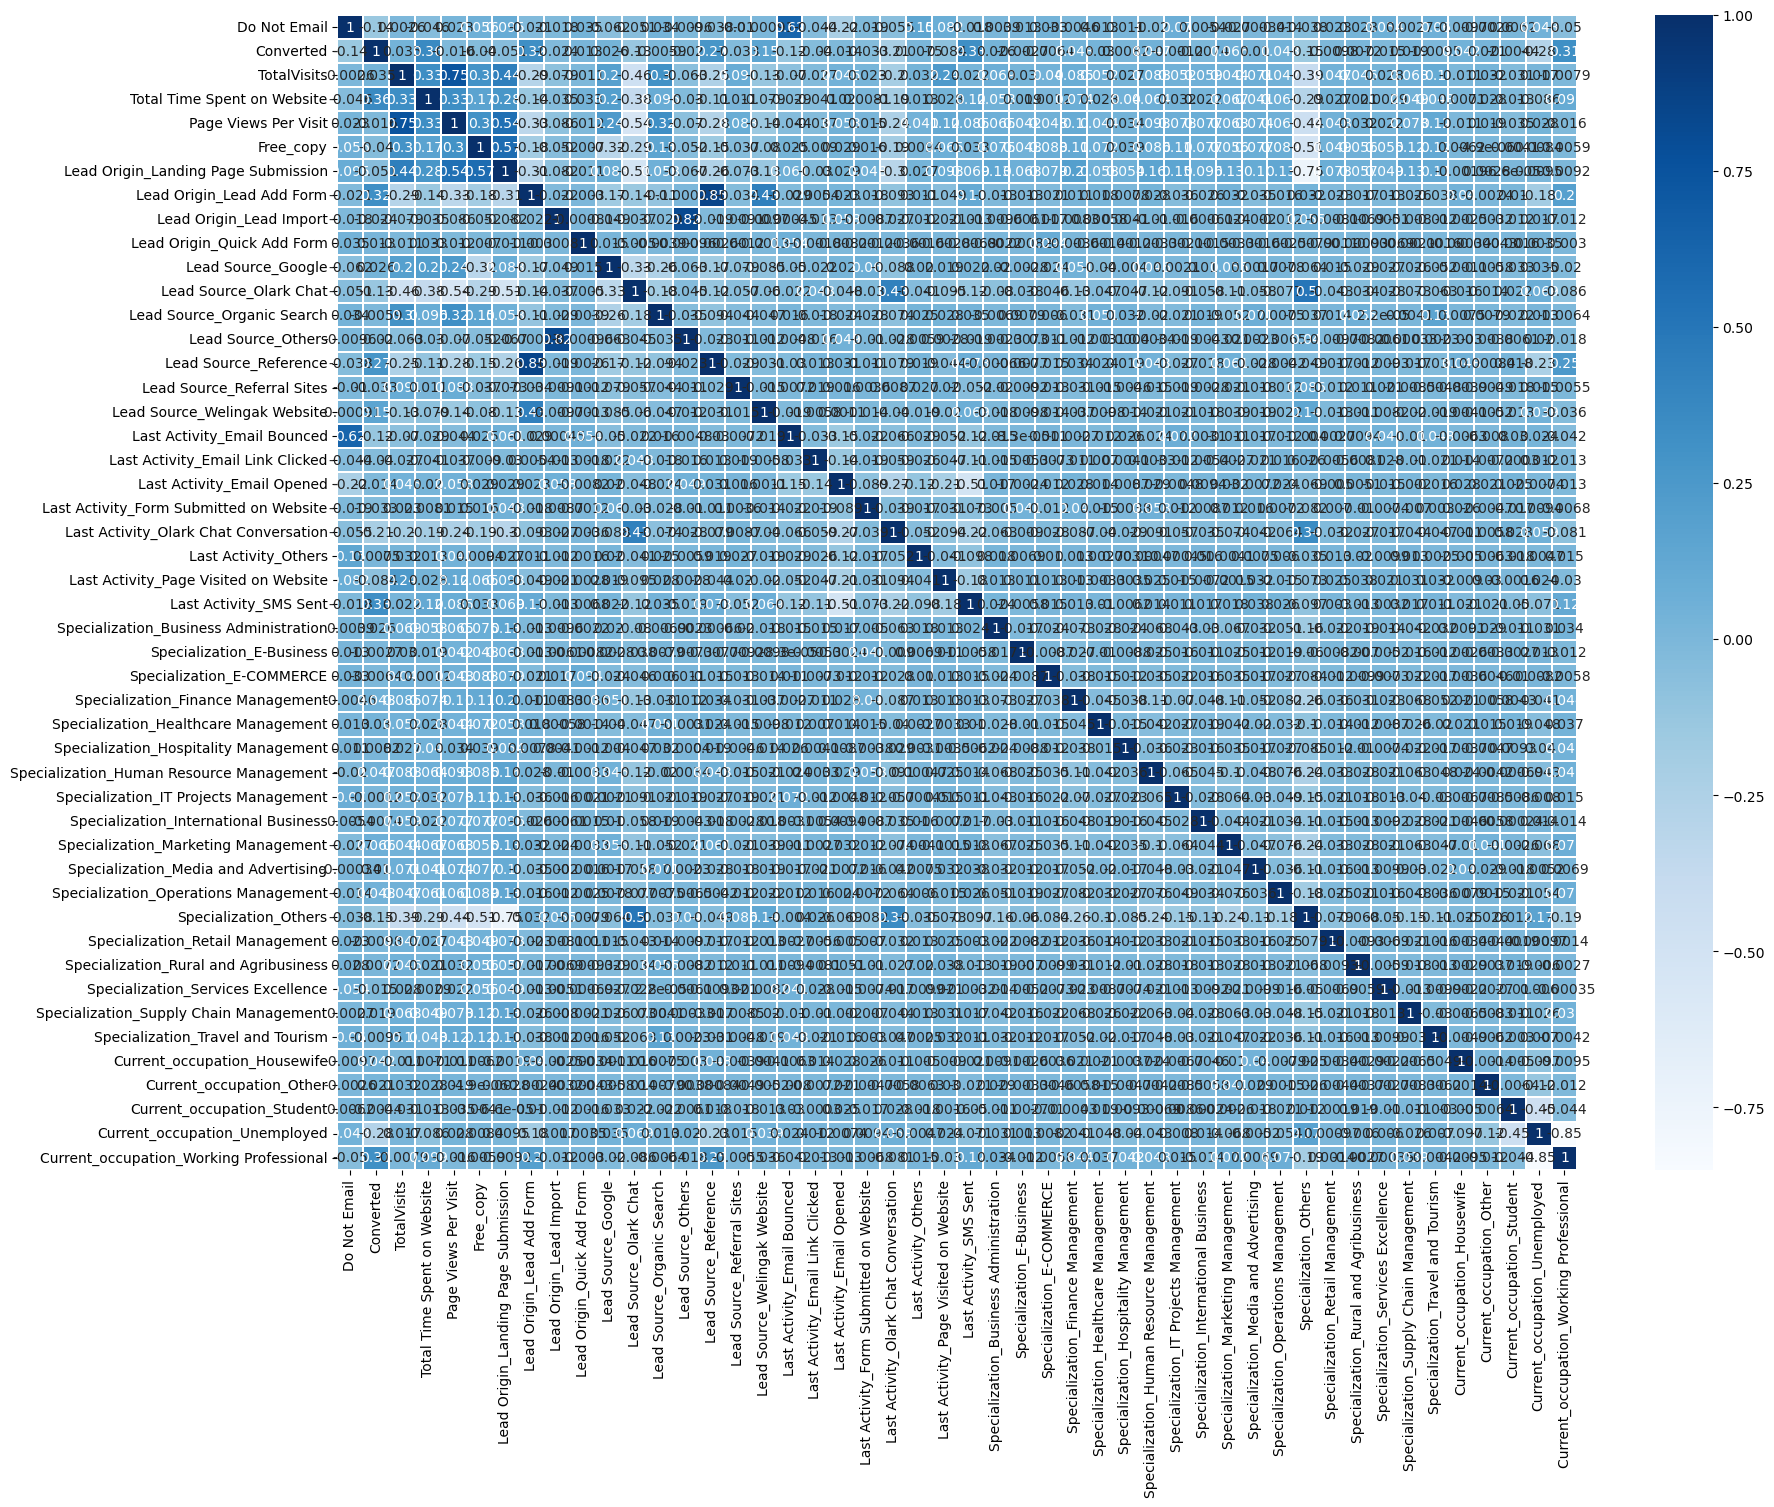

In [73]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

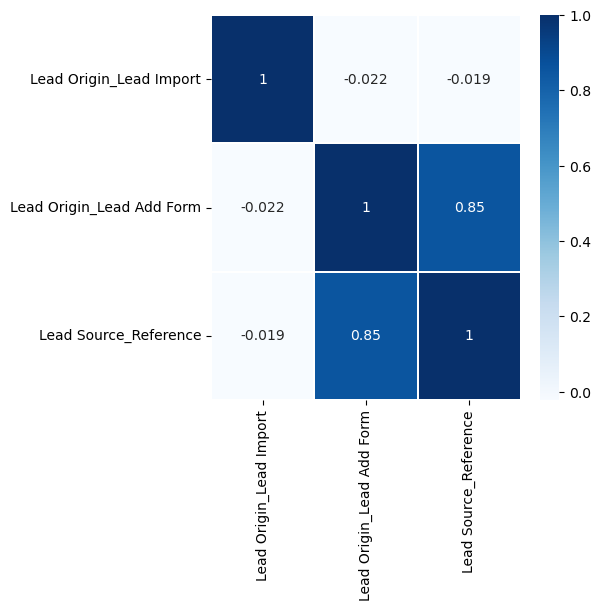

In [74]:
# as the above heatmap has so many columns lets breakdown suspected variables which migh have high correlation with each other
# analysing variables which might be highly correlated with each other from same class from above graph
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

<strong><span style="color:Blue">Note:</span></strong> These predictor variables above are very highly correlated with each other near diagonal with 0.85, it is better that we drop these variables from each pair as they won’t add much value to the model. So , we can drop any of them, lets drop `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'`.

In [75]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

In [76]:
df_leads.corr()

Do Not Email  Converted  \
Do Not Email                                  1.000000  -0.135580   
Converted                                    -0.135580   1.000000   
TotalVisits                                   0.002601   0.035074   
Total Time Spent on Website                  -0.046374   0.362483   
Page Views Per Visit                          0.022554  -0.015978   
Free_copy                                     0.055762  -0.039820   
Lead Origin_Landing Page Submission           0.095304  -0.051236   
Lead Origin_Lead Add Form                    -0.020983   0.321702   
Lead Origin_Lead Import                      -0.017529  -0.023695   
Lead Origin_Quick Add Form                    0.035416   0.013138   
Lead Source_Google                           -0.062113   0.026286   
Lead Source_Olark Chat                       -0.051436  -0.129459   
Lead Source_Organic Search                    0.034295  -0.005879   
Lead Source_Others                           -0.009607  -0.019591   
Lead Source_Reference                        -0.038451   0.270830   
Lead Source_Referral Sites                   -0.010149  -0.033058   
Lead Source_Welingak Website                 -0.000911   0.154153   
Last Activity_Email Bounced                   0.618470  -0.120095   
Last Activity_Email Link Clicked             -0.043505  -0.039690   
Last Activity_Email Opened                   -0.224090  -0.013850   
Last Activity_Form Submitted on Website      -0.018744  -0.033364   
Last Activity_Olark Chat Conversation        -0.055143  -0.210809   
Last Activity_Others                          0.145955   0.007541   
Last Activity_Page Visited on Website         0.082217  -0.083771   
Last Activity_SMS Sent                       -0.017564   0.325600   
Specialization_Business Administration        0.003893   0.025791   
Specialization_E-Business                     0.012636  -0.002747   
Specialization_E-COMMERCE                     0.033293  -0.006429   
Specialization_Finance Management            -0.004597   0.043308   
Specialization_Healthcare Management          0.013447   0.030306   
Specialization_Hospitality Management         0.010674   0.008190   
Specialization_Human Resource Management     -0.019910   0.047130   
Specialization_IT Projects Management         0.069613  -0.001200   
Specialization_International Business         0.005416  -0.007441   
Specialization_Marketing Management          -0.027271   0.065853   
Specialization_Media and Advertising         -0.000343   0.010264   
Specialization_Operations Management         -0.014036   0.043272   
Specialization_Others                        -0.037805  -0.154025   
Specialization_Retail Management              0.023426  -0.009755   
Specialization_Rural and Agribusiness         0.028032   0.007200   
Specialization_Services Excellence            0.053781  -0.014956   
Specialization_Supply Chain Management        0.002680   0.019245   
Specialization_Travel and Tourism             0.059722  -0.009457   
Current_occupation_Housewife                 -0.009669   0.041567   
Current_occupation_Other                     -0.002609   0.020505   
Current_occupation_Student                    0.006225  -0.004375   
Current_occupation_Unemployed                 0.042780  -0.281065   
Current_occupation_Working Professional      -0.049841   0.313837   

                                          TotalVisits  \
Do Not Email                                 0.002601   
Converted                                    0.035074   
TotalVisits                                  1.000000   
Total Time Spent on Website                  0.328152   
Page Views Per Visit                         0.746084   
Free_copy                                    0.297883   
Lead Origin_Landing Page Submission          0.443553   
Lead Origin_Lead Add Form                   -0.289587   
Lead Origin_Lead Import                     -0.079016   
Lead Origin_Quick Add Form                  -0.011127   
Lead Source_Google               

#### From Correlation Table and matrix it is found no variable to have high correlation

## <strong><span style="color:brown">Step 8: Model Building </span></strong>
- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

In [77]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6422
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.6
Date:                Sun, 19 Mar 2023   Deviance:                       5329.2
Time:                        21:09:43   Pearson chi2:                 8.08e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3967
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5939      1.163     -1.371      0.170      -3.873       0.685
Do Not Email                                -0.2902      0.053     -5.489      0.000      -0.394      -0.187
TotalVisits                                  0.3358      0.053      6.382      0.000       0.233       0.439
Total Time Spent on Website                  1.0467      0.040     26.486      0.000       0.969       1.124
Page Views Per Visit                        -0.3342      0.058     -5.728      0.000      -0.449      -0.220
Free_copy                                   -0.1156      0.050     -2.332      0.020      -0.213      -0.018
Lead Origin_Landing Page Submission         -1.0328      0.136     -7.583      0.000      -1.300      -0.766
Lead Origin_Quick Add Form                  20.9321   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                           0.1986      0.113      1.753      0.080      -0.023       0.421
Lead Source_Olark Chat                       1.0249      0.161      6.346      0.000       0.708       1.341
Lead Source_Organic Search                   0.1052      0.131      0.803      0.422      -0.152       0.362
Lead Source_Others                           0.1820      0.376      0.484      0.628      -0.555       0.919
Lead Source_Reference                        3.0214      0.246     12.299      0.000       2.540       3.503
Lead Source_Referral Sites                   0.0076      0.320      0.024      0.981      -0.619       0.634
Lead Source_Welingak Website                 5.5825      0.741      7.538      0.000       4.131       7.034
Last Activity_Email Bounced                  0.3757      0.405      0.927      0.354      -0.419       1.170
Last Activity_Email Link Clicked             0.6622      0.308      2.151      0.032       0.059       1.266
Last Activity_Email Opened                   1.1961      0.222      5.386      0.000       0.761       1.631
Last Activity_Form Submitted on Website      0.1935      0.406      0.477      0.633      -0.602       0.989
Last Activity_Olark Chat Conversation       -0.2978      0.273     -1.091      0.275      -0.833       0.237
Last Activity_Others                         1.8197      0.318      5.731      0.000       1.197       2.442
Last Activity_Page Visited on Website        0.4685      0.262      1.786      0.074      -0.046       0.983
Last Activity_SMS Sent                       2.4292      0.223     10.876      0.000       1.991       2.867
Specialization_Business Administration      -0.3214      0.243     -1.323      0.186      -0.798       0.155
Specialization_E-Business                   -0.0500      0.492     -0.102      0.919      -1.014       0.914
Specialization_E-COMMERCE      

###### Here, we use the GLM (Generalized Linear Models) method of the library statsmodels. 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Converted' and 'Not-Converted')

In [78]:
# Lets use RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False,  True, False,  True,  True, False,
        True,  True, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True])

In [80]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Free_copy', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 6),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Others', False, 21),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 25),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 5),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_E-Business', False

In [81]:
# columns which are selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_International Business', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness', 'Current_occupation_Housewife',
       'Current_occupation_Other', 'Current_occupation_Student',
       'Current_occupation_Unemployed',
       'Current_occupation_Working Professional'],
      dtype='object')

In [82]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [83]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

#### Model - 1

In [84]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params


const                                      -0.898732
Total Time Spent on Website                 1.054206
Lead Origin_Landing Page Submission        -1.264923
Lead Source_Olark Chat                      0.889861
Lead Source_Reference                       2.880100
Lead Source_Welingak Website                5.359607
Last Activity_Email Link Clicked            0.449319
Last Activity_Email Opened                  1.011577
Last Activity_Olark Chat Conversation      -0.475893
Last Activity_Others                        1.347292
Last Activity_SMS Sent                      2.140484
Specialization_Hospitality Management      -1.102968
Specialization_International Business      -0.441717
Specialization_Others                      -1.214712
Specialization_Retail Management           -0.447951
Specialization_Rural and Agribusiness       0.501092
Current_occupation_Housewife               22.825221
Current_occupation_Other                   -0.242572
Current_occupation_Student                  0.

In [85]:
#Let's see the summary of our logistic regression model
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.6
Date:                Sun, 19 Mar 2023   Deviance:                       5457.3
Time:                        21:09:47   Pearson chi2:                 8.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3847
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [86]:
# Now checking VIFs for all variables in the Model 1
get_vif(X_train_sm1)

Features      VIF
0                                     const  1088.28
1             Current_occupation_Unemployed    99.36
2   Current_occupation_Working Professional    78.32
3                Current_occupation_Student    23.26
4       Lead Origin_Landing Page Submission     3.44
5                     Specialization_Others     3.01
6              Current_occupation_Housewife     2.50
7                  Current_occupation_Other     2.33
8                Last Activity_Email Opened     2.08
9                    Last Activity_SMS Sent     2.04
10                   Lead Source_Olark Chat     1.88
11    Last Activity_Olark Chat Conversation     1.78
12                    Lead Source_Reference     1.49
13              Total Time Spent on Website     1.25
14         Last Activity_Email Link Clicked     1.16
15                     Last Activity_Others     1.11
16             Lead Source_Welingak Website     1.08
17    Specialization_International Business     1.02
18    Specialization_Hospitality Management     1.01
19         Specialization_Retail Management     1.01
20    Specialization_Rural and Agribusiness     1.01

<strong><span style="color:Blue">NOTE : </span></strong> "Current_occupation_Housewife" column will be removed from model due to high p-value of 0.999, which is above the accepted threshold of 0.05 for statistical significance.

#### Model - 2

In [87]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [88]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                      1.084317
Total Time Spent on Website                1.053731
Lead Origin_Landing Page Submission       -1.254167
Lead Source_Olark Chat                     0.890270
Lead Source_Reference                      2.883108
Lead Source_Welingak Website               5.360283
Last Activity_Email Link Clicked           0.453530
Last Activity_Email Opened                 1.016187
Last Activity_Olark Chat Conversation     -0.482486
Last Activity_Others                       1.340852
Last Activity_SMS Sent                     2.142056
Specialization_Hospitality Management     -1.102522
Specialization_International Business     -0.442040
Specialization_Others                     -1.207795
Specialization_Retail Management          -0.448688
Specialization_Rural and Agribusiness      0.500261
Current_occupation_Other                  -2.234264
Current_occupation_Student                -1.748497
Current_occupation_Unemployed             -2.189235
Current_occu

In [89]:
#Let's see the summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.8
Date:                Sun, 19 Mar 2023   Deviance:                       5463.6
Time:                        21:09:48   Pearson chi2:                 8.00e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3841
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [90]:
# Now checking VIFs for all variables in the Model 2
get_vif(X_train_sm2)

Features     VIF
0                                     const  446.27
1             Current_occupation_Unemployed   39.95
2   Current_occupation_Working Professional   31.90
3                Current_occupation_Student    9.91
4       Lead Origin_Landing Page Submission    3.44
5                     Specialization_Others    3.01
6                Last Activity_Email Opened    2.08
7                    Last Activity_SMS Sent    2.04
8                    Lead Source_Olark Chat    1.88
9     Last Activity_Olark Chat Conversation    1.78
10                 Current_occupation_Other    1.54
11                    Lead Source_Reference    1.49
12              Total Time Spent on Website    1.25
13         Last Activity_Email Link Clicked    1.16
14                     Last Activity_Others    1.11
15             Lead Source_Welingak Website    1.08
16    Specialization_International Business    1.02
17         Specialization_Retail Management    1.01
18    Specialization_Rural and Agribusiness    1.01
19    Specialization_Hospitality Management    1.01

<strong><span style="color:Blue">NOTE:</span></strong> "Current_occupation_Working Professional " column will be removed from model due to high p-value of 0.535, which is above the accepted threshold of 0.05 for statistical significance.


#### Model -3

In [91]:
rfe_col=rfe_col.drop("Current_occupation_Working Professional")

In [92]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                    1.554265
Total Time Spent on Website              1.053948
Lead Origin_Landing Page Submission     -1.253796
Lead Source_Olark Chat                   0.890525
Lead Source_Reference                    2.882912
Lead Source_Welingak Website             5.360563
Last Activity_Email Link Clicked         0.455800
Last Activity_Email Opened               1.017965
Last Activity_Olark Chat Conversation   -0.482532
Last Activity_Others                     1.343092
Last Activity_SMS Sent                   2.144289
Specialization_Hospitality Management   -1.100590
Specialization_International Business   -0.441221
Specialization_Others                   -1.207585
Specialization_Retail Management        -0.447300
Specialization_Rural and Agribusiness    0.501054
Current_occupation_Other                -2.705624
Current_occupation_Student              -2.220404
Current_occupation_Unemployed           -2.661284
dtype: float64

In [93]:
#Let's see the summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.0
Date:                Sun, 19 Mar 2023   Deviance:                       5464.0
Time:                        21:09:48   Pearson chi2:                 7.95e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3840
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [94]:
# Now checking VIFs for all variables in the Model 3
get_vif(X_train_sm3)

Features    VIF
0                                   const  27.70
1     Lead Origin_Landing Page Submission   3.44
2                   Specialization_Others   3.01
3              Last Activity_Email Opened   2.08
4                  Last Activity_SMS Sent   2.03
5                  Lead Source_Olark Chat   1.88
6   Last Activity_Olark Chat Conversation   1.78
7                   Lead Source_Reference   1.49
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.25
11       Last Activity_Email Link Clicked   1.16
12                   Last Activity_Others   1.11
13           Lead Source_Welingak Website   1.08
14  Specialization_International Business   1.02
15               Current_occupation_Other   1.02
16  Specialization_Hospitality Management   1.01
17       Specialization_Retail Management   1.01
18  Specialization_Rural and Agribusiness   1.01

<strong><span style="color:Blue">NOTE:</span></strong> "Specialization_Rural and Agribusiness" column will be removed from model due to high p-value of 0.191, which is above the accepted threshold of 0.05 for statistical significance.

#### Model -4

In [95]:
rfe_col=rfe_col.drop("Specialization_Rural and Agribusiness")

In [96]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                    1.560595
Total Time Spent on Website              1.053557
Lead Origin_Landing Page Submission     -1.253437
Lead Source_Olark Chat                   0.892086
Lead Source_Reference                    2.882243
Lead Source_Welingak Website             5.361255
Last Activity_Email Link Clicked         0.449889
Last Activity_Email Opened               1.015567
Last Activity_Olark Chat Conversation   -0.487355
Last Activity_Others                     1.344610
Last Activity_SMS Sent                   2.140958
Specialization_Hospitality Management   -1.106790
Specialization_International Business   -0.447821
Specialization_Others                   -1.214251
Specialization_Retail Management        -0.454078
Current_occupation_Other                -2.709529
Current_occupation_Student              -2.200910
Current_occupation_Unemployed           -2.659320
dtype: float64

In [97]:
#Let's see the summary of our logistic regression model
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Sun, 19 Mar 2023   Deviance:                       5465.7
Time:                        21:09:49   Pearson chi2:                 7.96e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [98]:
# Now checking VIFs for all variables in the Model 4
get_vif(X_train_sm4)

Features    VIF
0                                   const  27.67
1     Lead Origin_Landing Page Submission   3.44
2                   Specialization_Others   3.00
3              Last Activity_Email Opened   2.08
4                  Last Activity_SMS Sent   2.03
5                  Lead Source_Olark Chat   1.88
6   Last Activity_Olark Chat Conversation   1.78
7                   Lead Source_Reference   1.49
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.25
11       Last Activity_Email Link Clicked   1.15
12                   Last Activity_Others   1.11
13           Lead Source_Welingak Website   1.08
14  Specialization_International Business   1.02
15               Current_occupation_Other   1.02
16  Specialization_Hospitality Management   1.01
17       Specialization_Retail Management   1.01

<strong><span style="color:Blue">NOTE:</span></strong> "Specialization_Retail Management" column will be removed from model due to high p-value of 0.169, which is above the accepted threshold of 0.05 for statistical significance.

#### Model - 5

In [99]:
rfe_col=rfe_col.drop("Specialization_Retail Management")

In [100]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                    1.553042
Total Time Spent on Website              1.052042
Lead Origin_Landing Page Submission     -1.256810
Lead Source_Olark Chat                   0.889299
Lead Source_Reference                    2.879778
Lead Source_Welingak Website             5.358973
Last Activity_Email Link Clicked         0.457496
Last Activity_Email Opened               1.020264
Last Activity_Olark Chat Conversation   -0.481827
Last Activity_Others                     1.348112
Last Activity_SMS Sent                   2.143568
Specialization_Hospitality Management   -1.098029
Specialization_International Business   -0.439783
Specialization_Others                   -1.209066
Current_occupation_Other                -2.701314
Current_occupation_Student              -2.206216
Current_occupation_Unemployed           -2.659468
dtype: float64

In [101]:
#Let's see the summary of our logistic regression model
print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.8
Date:                Sun, 19 Mar 2023   Deviance:                       5467.6
Time:                        21:09:49   Pearson chi2:                 8.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3837
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [102]:
get_vif(X_train_sm5)

Features    VIF
0                                   const  27.65
1     Lead Origin_Landing Page Submission   3.44
2                   Specialization_Others   3.00
3              Last Activity_Email Opened   2.08
4                  Last Activity_SMS Sent   2.03
5                  Lead Source_Olark Chat   1.88
6   Last Activity_Olark Chat Conversation   1.78
7                   Lead Source_Reference   1.49
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.25
11       Last Activity_Email Link Clicked   1.15
12                   Last Activity_Others   1.11
13           Lead Source_Welingak Website   1.08
14               Current_occupation_Other   1.02
15  Specialization_Hospitality Management   1.01
16  Specialization_International Business   1.01

<strong><span style="color:Blue">NOTE:</span></strong> "Specialization_International Business" column will be removed from model due to high p-value of 0.077, which is above the accepted threshold of 0.05 for statistical significance.

### Model - 6

In [103]:
rfe_col=rfe_col.drop("Specialization_International Business")

In [104]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm6 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm6 = sm.GLM(y_train,X_train_sm6,family = sm.families.Binomial()).fit()  

logm6.params

const                                    1.542671
Total Time Spent on Website              1.053146
Lead Origin_Landing Page Submission     -1.255126
Lead Source_Olark Chat                   0.890822
Lead Source_Reference                    2.882661
Lead Source_Welingak Website             5.360757
Last Activity_Email Link Clicked         0.458879
Last Activity_Email Opened               1.020418
Last Activity_Olark Chat Conversation   -0.480053
Last Activity_Others                     1.336635
Last Activity_SMS Sent                   2.142896
Specialization_Hospitality Management   -1.084886
Specialization_Others                   -1.194066
Current_occupation_Other                -2.694346
Current_occupation_Student              -2.214270
Current_occupation_Unemployed           -2.664542
dtype: float64

In [105]:
#Let's see the summary of our logistic regression model
print(logm6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.4
Date:                Sun, 19 Mar 2023   Deviance:                       5470.8
Time:                        21:09:49   Pearson chi2:                 7.99e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [106]:
get_vif(X_train_sm6)

Features    VIF
0                                   const  27.64
1     Lead Origin_Landing Page Submission   3.44
2                   Specialization_Others   2.99
3              Last Activity_Email Opened   2.08
4                  Last Activity_SMS Sent   2.03
5                  Lead Source_Olark Chat   1.88
6   Last Activity_Olark Chat Conversation   1.78
7                   Lead Source_Reference   1.49
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.25
11       Last Activity_Email Link Clicked   1.15
12                   Last Activity_Others   1.10
13           Lead Source_Welingak Website   1.08
14               Current_occupation_Other   1.02
15  Specialization_Hospitality Management   1.01

<strong><span style="color:Blue">NOTE:</span></strong> "Last Activity_Email Link Clicked" column will be removed from model due to high p-value of 0.056, which is above the accepted threshold of 0.05 for statistical significance.

### Model - 7

In [107]:
rfe_col=rfe_col.drop("Last Activity_Email Link Clicked")

In [108]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm7 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm7 = sm.GLM(y_train,X_train_sm7,family = sm.families.Binomial()).fit()  

logm7.params

const                                    1.611184
Total Time Spent on Website              1.051169
Lead Origin_Landing Page Submission     -1.254631
Lead Source_Olark Chat                   0.902994
Lead Source_Reference                    2.898503
Lead Source_Welingak Website             5.398295
Last Activity_Email Opened               0.945739
Last Activity_Olark Chat Conversation   -0.561407
Last Activity_Others                     1.263168
Last Activity_SMS Sent                   2.068520
Specialization_Hospitality Management   -1.090978
Specialization_Others                   -1.191874
Current_occupation_Other                -2.710641
Current_occupation_Student              -2.216817
Current_occupation_Unemployed           -2.661669
dtype: float64

In [109]:
#Let's see the summary of our logistic regression model
print(logm7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.2
Date:                Sun, 19 Mar 2023   Deviance:                       5474.3
Time:                        21:09:50   Pearson chi2:                 8.01e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3831
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

<strong><span style="color:Blue">NOTE:</span></strong>  Model 7 is stable and has significant p-values within the threshold (p-values < 0.05), so we will use it for further analysis.

- Now lets check VIFs for these variables to check if there is any multicollinearity which exists among the independent variables

In [117]:
# Now checking VIFs for all variables in the Model 7 
get_vif(X_train_sm7)

Features    VIF
0                                   const  26.71
1     Lead Origin_Landing Page Submission   3.44
2                   Specialization_Others   2.99
3                  Lead Source_Olark Chat   1.87
4              Last Activity_Email Opened   1.86
5                  Last Activity_SMS Sent   1.84
6   Last Activity_Olark Chat Conversation   1.66
7                   Lead Source_Reference   1.48
8           Current_occupation_Unemployed   1.44
9              Current_occupation_Student   1.29
10            Total Time Spent on Website   1.25
11                   Last Activity_Others   1.09
12           Lead Source_Welingak Website   1.08
13               Current_occupation_Other   1.02
14  Specialization_Hospitality Management   1.01

<strong><span style="color:Blue">NOTE:</span></strong> No variable needs to be dropped as they all have good VIF values less than 5.
- p-values for all variables is less than 0.05
- This model looks acceptable as everything is under control (p-values & VIFs).
- So we will final our Model 7 for `Model Evaluation`

## <strong><span style="color:brown">Step 9: Model Evaluation </span></strong> 
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [118]:
# Getting the predicted values on the train set
y_train_pred = logm7.predict(X_train_sm7)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.466942
6795    0.072747
3516    0.245933
8105    0.768255
3934    0.210104
4844    0.987670
3297    0.106542
8071    0.995922
987     0.167217
7423    0.870086
dtype: float64

In [119]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46694181, 0.07274684, 0.24593292, 0.76825457, 0.21010374,
       0.98766994, 0.10654168, 0.99592196, 0.16721672, 0.87008626])

In [120]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

Converted  Converted_Prob  Prospect ID
0          0        0.466942         1871
1          0        0.072747         6795
2          0        0.245933         3516
3          0        0.768255         8105
4          0        0.210104         3934

<strong><span style="color:Blue">NOTE:</span></strong> Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [122]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.466942         1871          0
1          0        0.072747         6795          0
2          0        0.245933         3516          0
3          0        0.768255         8105          1
4          0        0.210104         3934          0

### 9.1 Confusion Matrix

In [123]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 842 1624]]


In [124]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 9.2 Accuracy

In [125]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8058132343846629


### 9.3 Metrics beyond simply accuracy
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6585563665855637


In [129]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.896551724137931


In [130]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.10344827586206896


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.7968596663395485


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8099322799097065


### 9.4 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [133]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

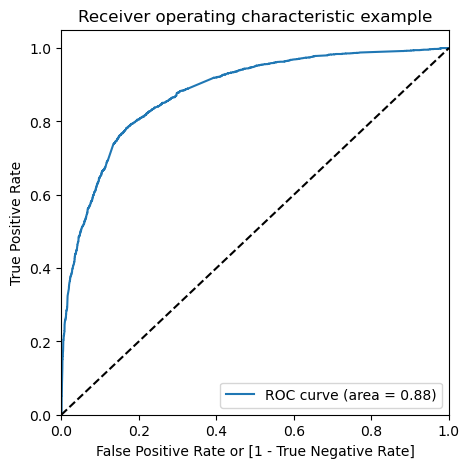

In [135]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### 9.4.1 Finding Optimal Cutoff Point/ Probability
- It is that probability where we get `balanced sensitivity and specificity`

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.466942         1871          0    1    1    1    1    1   
1          0        0.072747         6795          0    1    0    0    0    0   
2          0        0.245933         3516          0    1    1    1    0    0   
3          0        0.768255         8105          1    1    1    1    1    1   
4          0        0.210104         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.598794  0.974047  0.367566
0.2   0.2  0.720625  0.920114  0.597701
0.3   0.3  0.791435  0.832522  0.766117
0.4   0.4  0.815244  0.765612  0.845827
0.5   0.5  0.805813  0.658556  0.896552
0.6   0.6  0.793135  0.586375  0.920540
0.7   0.7  0.780612  0.510543  0.947026
0.8   0.8  0.755257  0.408354  0.969015
0.9   0.9  0.709184  0.251419  0.991254


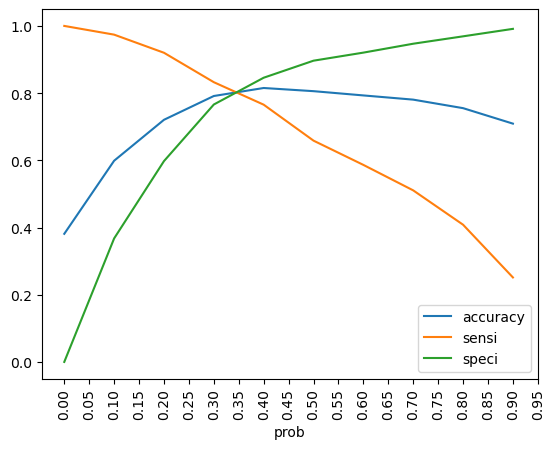

<Figure size 1100x1100 with 0 Axes>

In [138]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.show()

<strong><span style="color:Blue">NOTE:</span></strong> 0.345 is the approx. point where all the curves meet, so 0.345 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.466942         1871                1
1          0        0.072747         6795                0
2          0        0.245933         3516                0
3          0        0.768255         8105                1
4          0        0.210104         3934                0

### 9.5 Calculating all metrics using confusion matrix for Train

In [140]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8048855905998763


In [141]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    

In [142]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3231  771]
 [ 491 1975]] 

************************************************** 

True Negative                    :  3231
True Positive                    :  1975
False Negative                   :  491
False Positve                    :  771
Model Accuracy                   :  0.8049
Model Sensitivity                :  0.8009
Model Specificity                :  0.8073
Model Precision                  :  0.7192
Model Recall                     :  0.8009
Model True Positive Rate (TPR)   :  0.8009
Model False Positive Rate (FPR)  :  0.1927


************************************************** 



### 9.6 Precision and recall tradeoff
- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked by CEO.

In [143]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

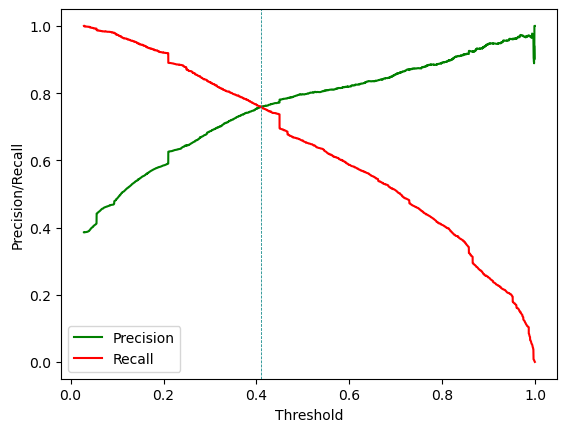

In [144]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

<strong><span style="color:Blue">NOTE:</span></strong> The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.41 aprrox from above curve.

In [145]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [146]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.466942         1871                1   
1          0        0.072747         6795                0   
2          0        0.245933         3516                0   
3          0        0.768255         8105                1   
4          0        0.210104         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [147]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[3407  595]
 [ 592 1874]] 

************************************************** 

True Negative                    :  3407
True Positive                    :  1874
False Negative                   :  592
False Positve                    :  595
Model Accuracy                   :  0.8165
Model Sensitivity                :  0.7599
Model Specificity                :  0.8513
Model Precision                  :  0.759
Model Recall                     :  0.7599
Model True Positive Rate (TPR)   :  0.7599
Model False Positive Rate (FPR)  :  0.1487


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong> 
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

### <strong><span style="color:purple"> Adding `Lead Score` Feature to Training dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [149]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.466942         1871                1          47
1          0        0.072747         6795                0           7
2          0        0.245933         3516                0          25
3          0        0.768255         8105                1          77
4          0        0.210104         3934                0          21

## <strong><span style="color:brown">Step 10: Making Predictions on test set </span></strong> 

### 10.1 Scaling Test dataset

In [150]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Google                        2772 non-null   uint8  
 8   Lead Source_Olark Chat                    2772 non-null   uint8  
 9   Lead Source_Organic Search                2772 non-null   uint8  
 10  Lead Source_Others               

In [151]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Current_occupation_Other  \
4269                      1                         0   
2376                      1                         0   
7766                      0                         0   
9199                      1                         0   
4359                      0                         0   

      Current_occupation_Student  Current_occupation_Unemployed  
4269                           0                              1  
2376                           0                              1  
7766                           0                              0  
9199                           0                              1  
4359                           0                              1

### 10.2 Prediction on Test Dataset using final model 

In [152]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 15)

In [153]:
# making prediction using model 4 (final model)
y_test_pred = logm7.predict(X_test_sm)

In [154]:
# top 10 columns
y_test_pred[:10]

4269    0.698469
2376    0.857416
7766    0.886669
9199    0.055648
4359    0.865656
9186    0.502459
1631    0.415403
8963    0.152927
8007    0.070821
5324    0.297438
dtype: float64

In [155]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.698469
2376  0.857416
7766  0.886669
9199  0.055648
4359  0.865656

In [156]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [157]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.698469
1          1         2376  0.857416
2          1         7766  0.886669
3          0         9199  0.055648
4          1         4359  0.865656

In [158]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.698469
1         2376          1        0.857416
2         7766          1        0.886669
3         9199          0        0.055648
4         4359          1        0.865656

In [159]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.698469                1
1         2376          1        0.857416                1
2         7766          1        0.886669                1
3         9199          0        0.055648                0
4         4359          1        0.865656                1

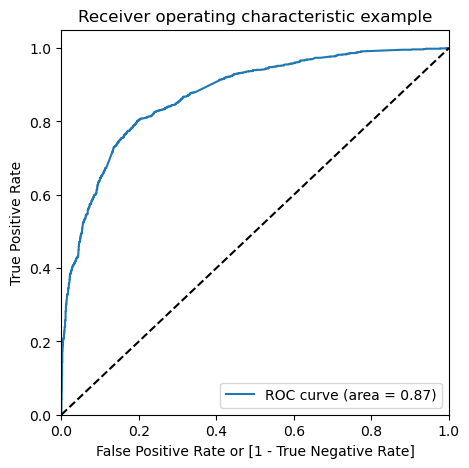

In [160]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

<strong><span style="color:Blue">NOTE:</span></strong> Area under ROC curve is 0.87 out of 1 which indicates a good predictive model


<strong><span style="color:Blue">NOTE:</span></strong> 
- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.

### 10.3 Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [161]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1351  326]
 [ 222  873]] 

************************************************** 

True Negative                    :  1351
True Positive                    :  873
False Negative                   :  222
False Positve                    :  326
Model Accuracy                   :  0.8023
Model Sensitivity                :  0.7973
Model Specificity                :  0.8056
Model Precision                  :  0.7281
Model Recall                     :  0.7973
Model True Positive Rate (TPR)   :  0.7973
Model False Positive Rate (FPR)  :  0.1944


************************************************** 



<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `For Test set`
    - Accuracy : 80.23%
    - Sensitivity : 79.73% ≈ 80%
    - Specificity : 80.56%
    
These matrics are very close to train set, so out final model logm4 is  performing with good consistency on both Train & Test set

In [162]:
# features and their coefficicent from final model
parameters=logm7.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website             5.398295
Lead Source_Reference                    2.898503
Last Activity_SMS Sent                   2.068520
const                                    1.611184
Last Activity_Others                     1.263168
Total Time Spent on Website              1.051169
Last Activity_Email Opened               0.945739
Lead Source_Olark Chat                   0.902994
Last Activity_Olark Chat Conversation   -0.561407
Specialization_Hospitality Management   -1.090978
Specialization_Others                   -1.191874
Lead Origin_Landing Page Submission     -1.254631
Current_occupation_Student              -2.216817
Current_occupation_Unemployed           -2.661669
Current_occupation_Other                -2.710641
dtype: float64

<strong><span style="color:Blue">NOTE:</span></strong> A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

## <strong><span style="color:purple"> Adding `Lead Score` Feature to Test dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [163]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.698469                1          70
1         2376          1        0.857416                1          86
2         7766          1        0.886669                1          89
3         9199          0        0.055648                0           6
4         4359          1        0.865656                1          87

<strong><span style="color:purple">Lead Score: </span></strong> Lead Score is assigned to the customers
- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

# <strong><span style="color:brown">Conclusion </span></strong> 

##  Train - Test
### <strong><span style="color:purple">Train Data Set:</span></strong>            

- <strong><span style="color:Green">Accuracy:</span></strong> 80.58%

- <strong><span style="color:Green">Sensitivity:</span></strong> 80.05%

- <strong><span style="color:Green">Specificity:</span></strong> 80.71%

### <strong><span style="color:purple">Test Data Set:</span></strong> 

- <strong><span style="color:Green">Accuracy:</span></strong> 80.23%

- <strong><span style="color:Green">Sensitivity:</span></strong> 79.82% ≈ 80%

- <strong><span style="color:Green">Specificity:</span></strong> 80.68%
 

<strong><span style="color:Blue">NOTE:</span></strong> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 80.05%` in the train set and 79.82% in the test set, using a cut-off value of 0.345.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.46%, which is in line with the study's objectives.
<hr/>


### Inferences:
- The organisation should focus on improving their website both UI and UX wise. They can also make it more informatie as it has been observed that leads who spend a lot of time on the website are hot leads.
- Leads generated through past referrals are hot leads.
- The company should focus more on Working Professionals specially at manager levels as there is a high chance of them getting converted as they could be looking for a boost in their current role.
- Leads generated by Add Forms are also hot leads.